### Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


In [14]:
df = pd.read_csv('../Final_dataset/weather_data.csv')
df

,campus_id,timestamp,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction
0,1,2018-01-01 00:00:00,16.6,16.2,13.5,84.0,3.6,142.0
1,1,2018-01-01 00:01:00,17.2,16.1,13.6,85.0,0.0,134.0
2,1,2018-01-01 00:02:00,16.9,16.1,13.6,85.0,1.8,130.0
3,1,2018-01-01 00:03:00,16.9,16.1,13.6,85.0,1.8,130.0
4,1,2018-01-01 00:04:00,16.0,16.0,13.5,85.0,5.4,129.0
...,...,...,...,...,...,...,...,...
7396515,5,2022-04-30 21:30:00,7.5,9.7,7.8,88.0,NaN,NaN
7396516,5,2022-04-30 22:00:00,7.4,9.3,7.7,90.0,NaN,NaN
7396517,5,2022-04-30 22:30:00,7.5,9.4,7.7,89.0,NaN,NaN
7396518,5,2022-04-30 23:00:00,7.7,9.2,8.3,94.0,NaN,NaN


In [3]:
# Display the first few rows of the DataFrame
print(df.head())

   campus_id            timestamp  apparent_temperature  air_temperature  \
0          1  2018-01-01 00:00:00                  16.6             16.2   
1          1  2018-01-01 00:01:00                  17.2             16.1   
2          1  2018-01-01 00:02:00                  16.9             16.1   
3          1  2018-01-01 00:03:00                  16.9             16.1   
4          1  2018-01-01 00:04:00                  16.0             16.0   

   dew_point_temperature  relative_humidity  wind_speed  wind_direction  
0                   13.5               84.0         3.6           142.0  
1                   13.6               85.0         0.0           134.0  
2                   13.6               85.0         1.8           130.0  
3                   13.6               85.0         1.8           130.0  
4                   13.5               85.0         5.4           129.0  


In [5]:
# Display the first few rows of the DataFrame
print(df.describe())

          campus_id  apparent_temperature  air_temperature  \
count  7.396520e+06          7.396520e+06     7.396520e+06   
mean   2.480264e+00          1.316374e+01     1.579196e+01   
std    1.107213e+00          7.931828e+00     7.859730e+00   
min    1.000000e+00         -9.800000e+00    -3.100000e+00   
25%    2.000000e+00          7.300000e+00     1.020000e+01   
50%    2.000000e+00          1.210000e+01     1.470000e+01   
75%    3.000000e+00          1.840000e+01     2.060000e+01   
max    5.000000e+00          4.320000e+01     4.660000e+01   

       dew_point_temperature  relative_humidity    wind_speed  wind_direction  
count           7.396520e+06       7.396520e+06  7.337253e+06    7.336534e+06  
mean            7.440377e+00       6.445799e+01  1.122814e+01    1.823718e+02  
std             4.492532e+00       2.506598e+01  7.701814e+00    9.865130e+01  
min            -2.310000e+01       2.000000e+00  0.000000e+00    0.000000e+00  
25%             4.500000e+00       4.5000

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7396520 entries, 0 to 7396519
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   campus_id              int64  
 1   timestamp              object 
 2   apparent_temperature   float64
 3   air_temperature        float64
 4   dew_point_temperature  float64
 5   relative_humidity      float64
 6   wind_speed             float64
 7   wind_direction         float64
dtypes: float64(6), int64(1), object(1)
memory usage: 451.4+ MB


In [7]:
df.nunique()


campus_id                      5
timestamp                2009485
apparent_temperature         508
air_temperature              498
dew_point_temperature        438
relative_humidity             99
wind_speed                    55
wind_direction               360
dtype: int64

In [8]:
(df.isnull().sum()/(len(df)))*100


campus_id                0.000000
timestamp                0.000000
apparent_temperature     0.000000
air_temperature          0.000000
dew_point_temperature    0.000000
relative_humidity        0.000000
wind_speed               0.801282
wind_direction           0.811003
dtype: float64

In [9]:
df.isnull().sum()


campus_id                    0
timestamp                    0
apparent_temperature         0
air_temperature              0
dew_point_temperature        0
relative_humidity            0
wind_speed               59267
wind_direction           59986
dtype: int64

### Statistics Summary
The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [10]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
campus_id,7396520.0,2.480264,1.107213,1.0,2.0,2.0,3.0,5.0
apparent_temperature,7396520.0,13.163737,7.931828,-9.8,7.3,12.1,18.4,43.2
air_temperature,7396520.0,15.791965,7.859730,-3.1,10.2,14.7,20.6,46.6
dew_point_temperature,7396520.0,7.440377,4.492532,-23.1,4.5,7.2,10.2,25.8
relative_humidity,7396520.0,64.457989,25.065984,2.0,45.0,66.0,86.0,100.0
wind_speed,7337253.0,11.228140,7.701814,0.0,5.4,11.2,16.6,87.1
wind_direction,7336534.0,182.371818,98.651304,0.0,107.0,186.0,261.0,359.0


In [11]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
campus_id,7396520.0,NaN,NaN,NaN,2.480264,1.107213,1.0,2.0,2.0,3.0,5.0
timestamp,7396520,2009485,2020-12-16 07:45:00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apparent_temperature,7396520.0,NaN,NaN,NaN,13.163737,7.931828,-9.8,7.3,12.1,18.4,43.2
air_temperature,7396520.0,NaN,NaN,NaN,15.791965,7.85973,-3.1,10.2,14.7,20.6,46.6
dew_point_temperature,7396520.0,NaN,NaN,NaN,7.440377,4.492532,-23.1,4.5,7.2,10.2,25.8
relative_humidity,7396520.0,NaN,NaN,NaN,64.457989,25.065984,2.0,45.0,66.0,86.0,100.0
wind_speed,7337253.0,NaN,NaN,NaN,11.22814,7.701814,0.0,5.4,11.2,16.6,87.1
wind_direction,7336534.0,NaN,NaN,NaN,182.371818,98.651304,0.0,107.0,186.0,261.0,359.0


In [12]:
df = df.dropna()
df

,campus_id,timestamp,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction
0,1,2018-01-01 00:00:00,16.6,16.2,13.5,84.0,3.6,142.0
1,1,2018-01-01 00:01:00,17.2,16.1,13.6,85.0,0.0,134.0
2,1,2018-01-01 00:02:00,16.9,16.1,13.6,85.0,1.8,130.0
3,1,2018-01-01 00:03:00,16.9,16.1,13.6,85.0,1.8,130.0
4,1,2018-01-01 00:04:00,16.0,16.0,13.5,85.0,5.4,129.0
...,...,...,...,...,...,...,...,...
7386706,5,2021-01-14 03:36:00,16.0,19.0,11.8,63.0,18.4,225.0
7386707,5,2021-01-14 03:37:00,15.6,19.0,11.8,63.0,20.5,215.0
7386708,5,2021-01-14 03:38:00,16.2,18.9,11.7,63.0,16.6,218.0
7386709,5,2021-01-14 03:39:00,15.4,18.9,11.7,63.0,20.5,225.0


In [13]:
df.isnull().sum()


campus_id                0
timestamp                0
apparent_temperature     0
air_temperature          0
dew_point_temperature    0
relative_humidity        0
wind_speed               0
wind_direction           0
dtype: int64

### Time Range:

Determine the time range of the dataset (from the earliest to the latest timestamp).

In [14]:
# Time Range
print("\nTime Range:")
print("Earliest Timestamp:", df['timestamp'].min())
print("Latest Timestamp:", df['timestamp'].max())


Time Range:
Earliest Timestamp: 2018-01-01 00:00:00
Latest Timestamp: 2021-10-20 04:39:00


### EDA Bivariate Analysis
Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In our example, a pair plot has been used to show the relationship between two Categorical variables.

MemoryError: Unable to allocate 14.0 MiB for an array with shape (7336534, 2) and data type bool

<Figure size 1300x1700 with 0 Axes>

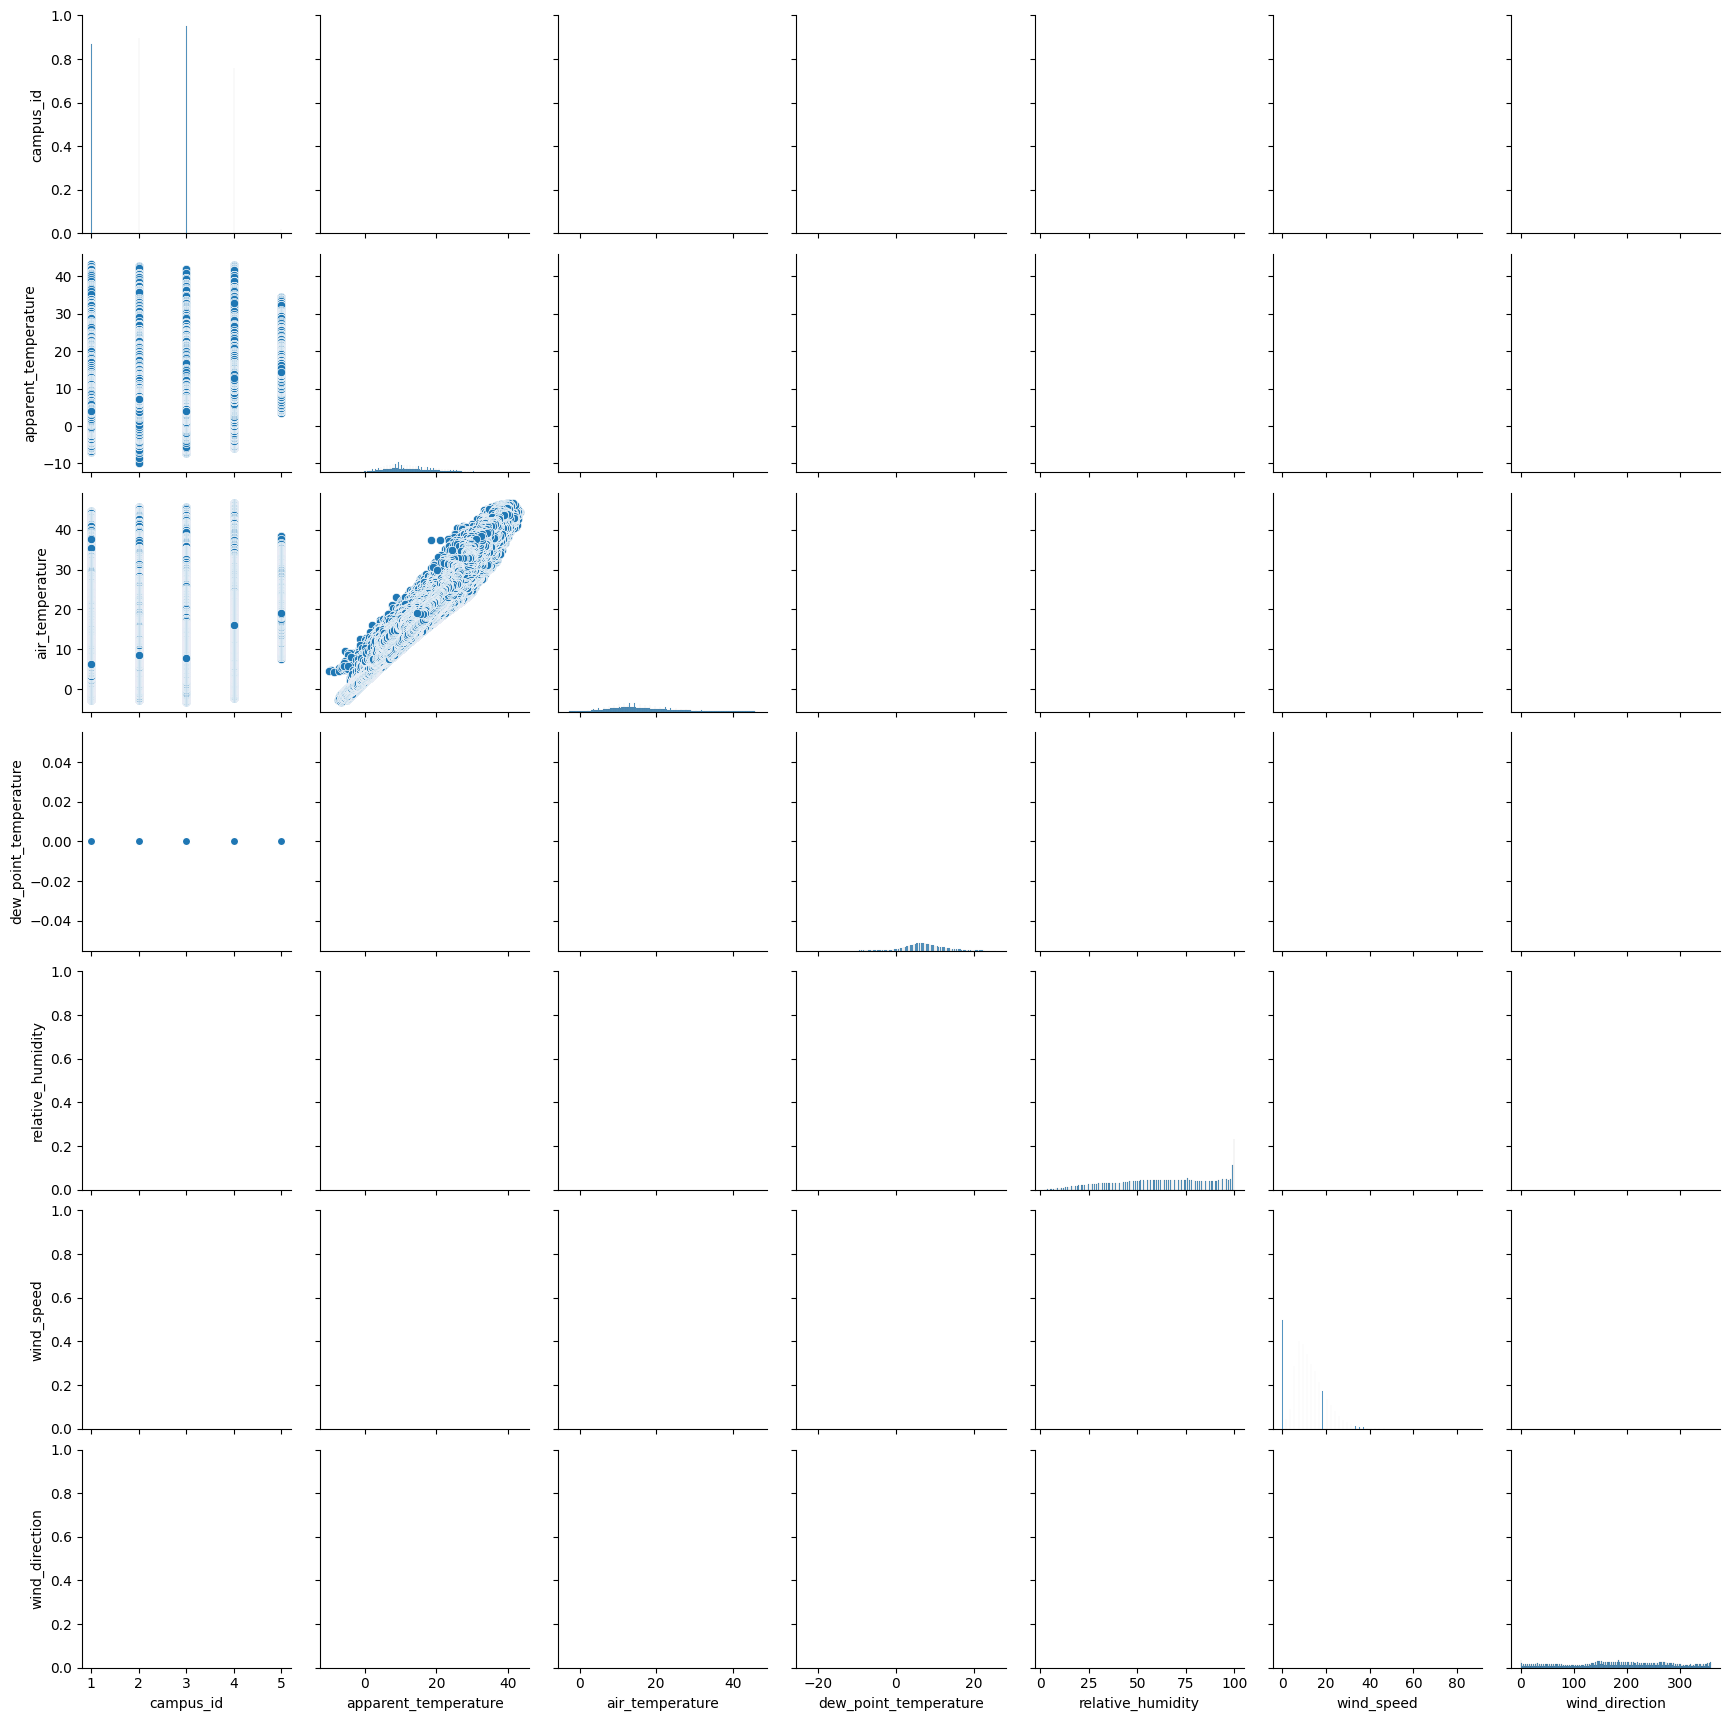

In [15]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df.drop(['timestamp'],axis=1))
plt.title('EDA Bivariate Analysis')
plt.show()

### EDA Multivariate Analysis
As the name suggests, Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

##### A heat map is widely been used for Multivariate Analysis

Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

In our example heat map shows the correlation between the variables.

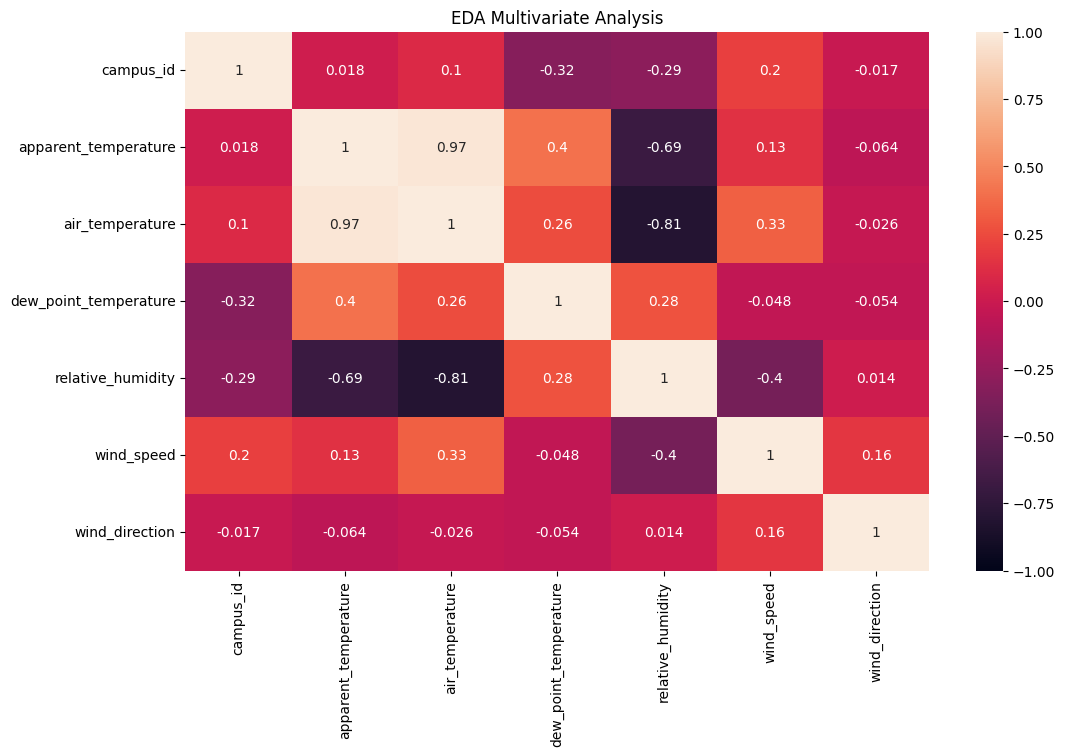

In [16]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.drop(['timestamp'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.title('EDA Multivariate Analysis')
plt.show()

### Distribution of Consumption:

Plot a histogram or density plot to visualize the distribution of consumption.
Calculate summary statistics such as mean, median, standard deviation, min, max, etc., for consumption.

In [18]:
df.columns

Index(['campus_id', 'timestamp', 'apparent_temperature', 'air_temperature',
       'dew_point_temperature', 'relative_humidity', 'wind_speed',
       'wind_direction'],
      dtype='object')

In [34]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['apparent_temperature'], bins=50, kde=True)
plt.title('Distribution of apparent_temperature')
plt.xlabel('apparent_temperature')
plt.ylabel('Frequency')
plt.show()

KeyError: 'apparent_temperature'

<Figure size 1000x600 with 0 Axes>

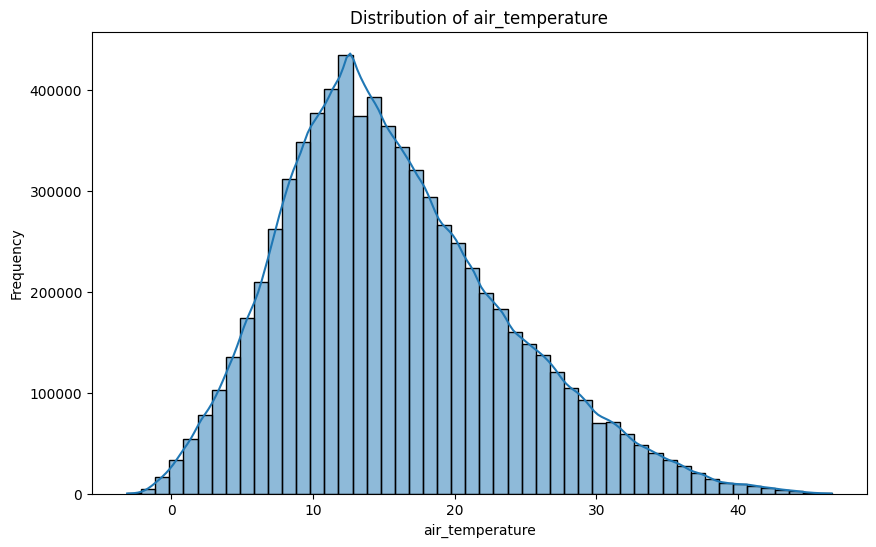

In [20]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['air_temperature'], bins=50, kde=True)
plt.title('Distribution of air_temperature')
plt.xlabel('air_temperature')
plt.ylabel('Frequency')
plt.show()

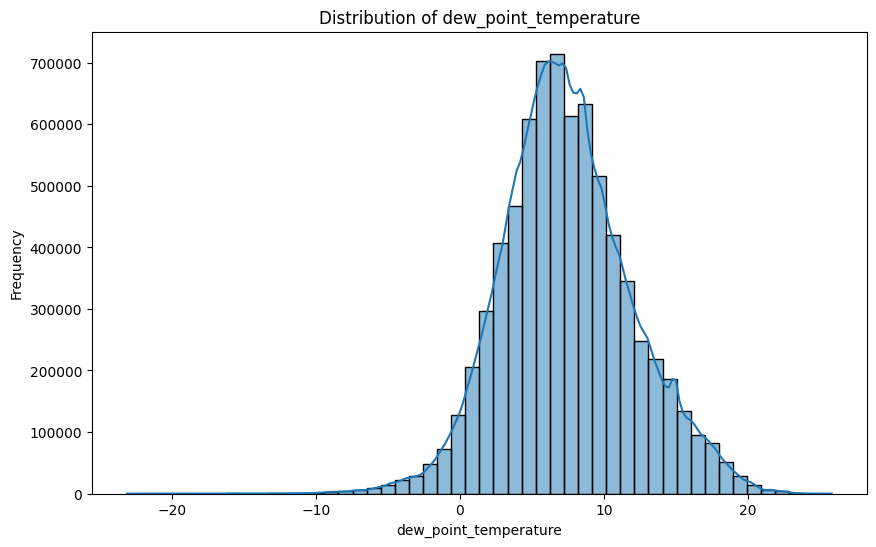

In [21]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['dew_point_temperature'], bins=50, kde=True)
plt.title('Distribution of dew_point_temperature')
plt.xlabel('dew_point_temperature')
plt.ylabel('Frequency')
plt.show()

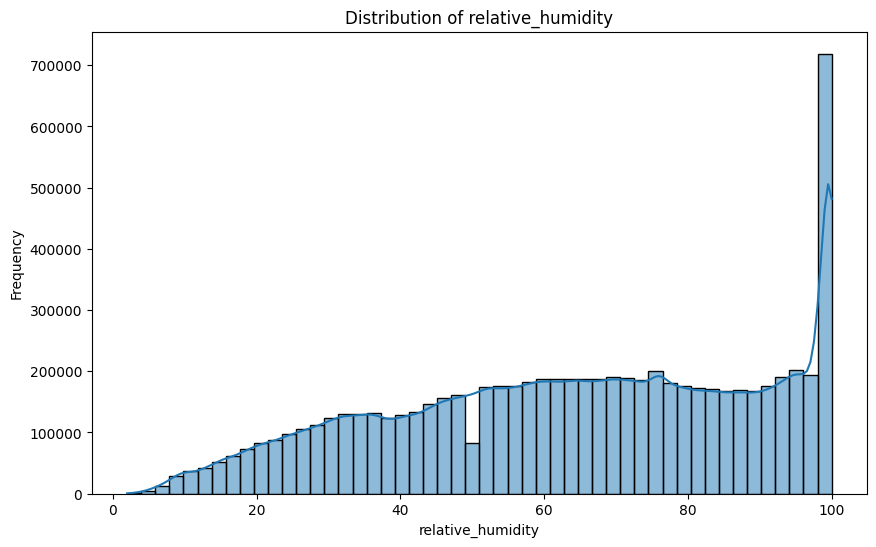

In [22]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['relative_humidity'], bins=50, kde=True)
plt.title('Distribution of relative_humidity')
plt.xlabel('relative_humidity')
plt.ylabel('Frequency')
plt.show()

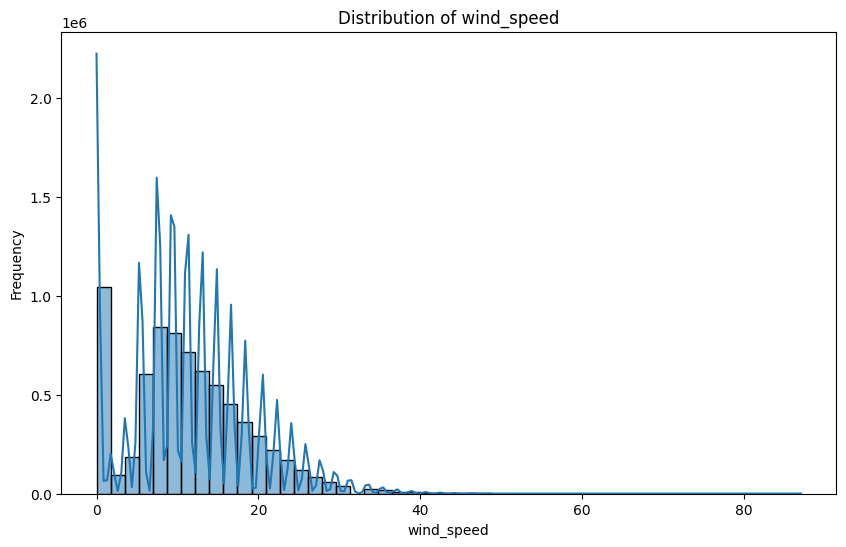

In [23]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['wind_speed'], bins=50, kde=True)
plt.title('Distribution of wind_speed')
plt.xlabel('wind_speed')
plt.ylabel('Frequency')
plt.show()

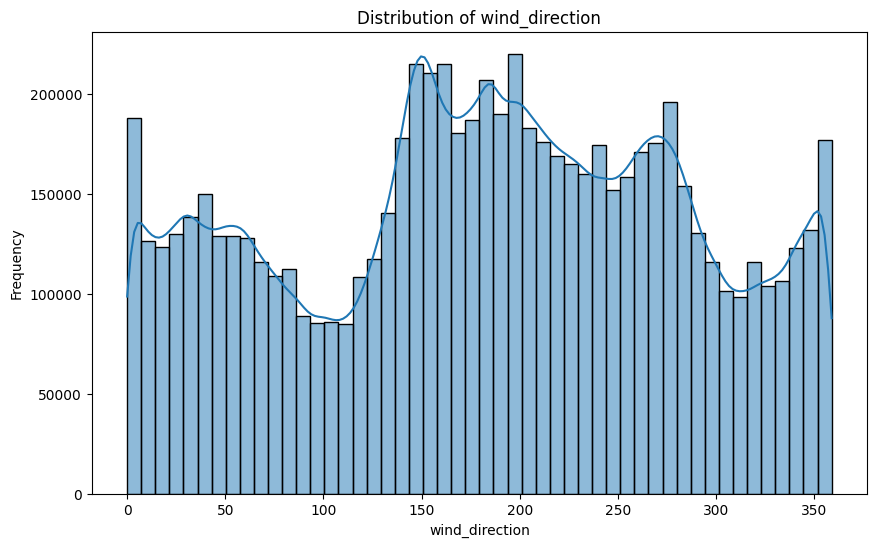

In [24]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['wind_direction'], bins=50, kde=True)
plt.title('Distribution of wind_direction')
plt.xlabel('wind_direction')
plt.ylabel('Frequency')
plt.show()

In [25]:
print("\nSummary Statistics for Consumption:")
print(df['apparent_temperature'].describe())


Summary Statistics for Consumption:
count    7.336534e+06
mean     1.313754e+01
std      7.932209e+00
min     -9.800000e+00
25%      7.300000e+00
50%      1.200000e+01
75%      1.840000e+01
max      4.320000e+01
Name: apparent_temperature, dtype: float64


In [26]:
print("\nSummary Statistics for Consumption:")
print(df['air_temperature'].describe())


Summary Statistics for Consumption:
count    7.336534e+06
mean     1.577145e+01
std      7.864219e+00
min     -3.100000e+00
25%      1.010000e+01
50%      1.460000e+01
75%      2.060000e+01
max      4.660000e+01
Name: air_temperature, dtype: float64


In [27]:
print("\nSummary Statistics for Consumption:")
print(df['dew_point_temperature'].describe())


Summary Statistics for Consumption:
count    7.336534e+06
mean     7.416473e+00
std      4.483788e+00
min     -2.310000e+01
25%      4.500000e+00
50%      7.200000e+00
75%      1.020000e+01
max      2.580000e+01
Name: dew_point_temperature, dtype: float64


In [28]:
print("\nSummary Statistics for Consumption:")
print(df['relative_humidity'].describe())


Summary Statistics for Consumption:
count    7.336534e+06
mean     6.444978e+01
std      2.507516e+01
min      2.000000e+00
25%      4.500000e+01
50%      6.600000e+01
75%      8.600000e+01
max      1.000000e+02
Name: relative_humidity, dtype: float64


In [29]:
print("\nSummary Statistics for Consumption:")
print(df['wind_speed'].describe())


Summary Statistics for Consumption:
count    7.336534e+06
mean     1.122855e+01
std      7.701911e+00
min      0.000000e+00
25%      5.400000e+00
50%      1.120000e+01
75%      1.660000e+01
max      8.710000e+01
Name: wind_speed, dtype: float64


In [30]:
print("\nSummary Statistics for Consumption:")
print(df['wind_direction'].describe())


Summary Statistics for Consumption:
count    7.336534e+06
mean     1.823718e+02
std      9.865130e+01
min      0.000000e+00
25%      1.070000e+02
50%      1.860000e+02
75%      2.610000e+02
max      3.590000e+02
Name: wind_direction, dtype: float64


### Consumption Trends Over Time:

Plot a time series graph of consumption over the entire time range.
Analyze any noticeable trends, seasonality, or patterns in the consumption data.

C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_7200\1071883015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


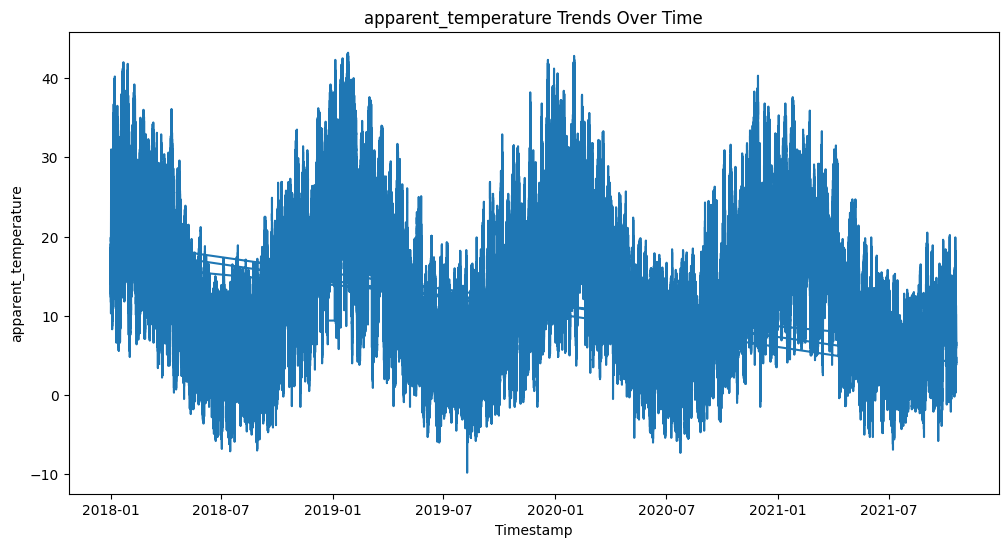

In [31]:
# Consumption Trends Over Time
df['timestamp'] = pd.to_datetime(df['timestamp'])
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['apparent_temperature'])
plt.title('apparent_temperature Trends Over Time')
plt.xlabel('Timestamp')
plt.ylabel('apparent_temperature')
plt.show()

C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_7200\141699710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


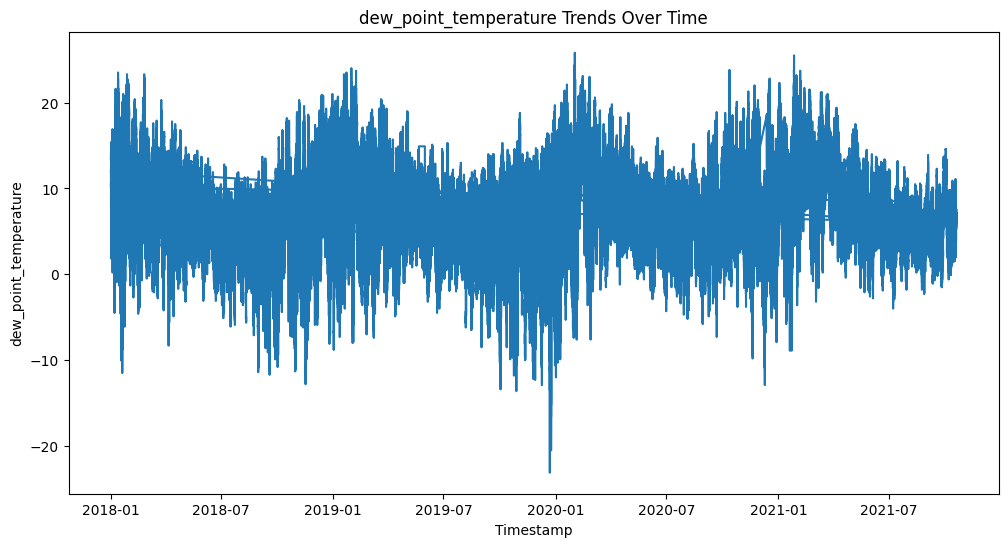

In [34]:
# Consumption Trends Over Time
df['timestamp'] = pd.to_datetime(df['timestamp'])
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['dew_point_temperature'])
plt.title('dew_point_temperature Trends Over Time')
plt.xlabel('Timestamp')
plt.ylabel('dew_point_temperature')
plt.show()

C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_7200\3069687448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


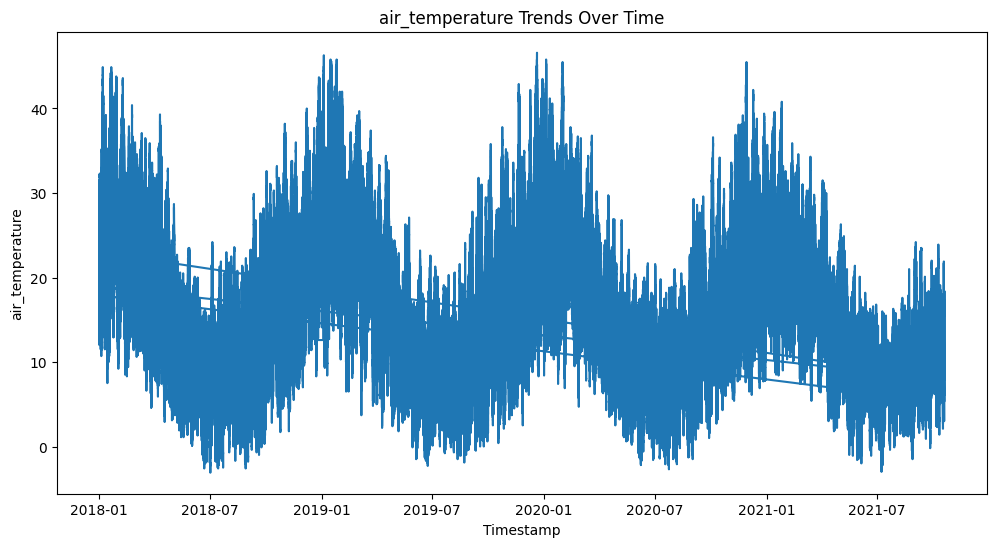

In [35]:
# Consumption Trends Over Time
df['timestamp'] = pd.to_datetime(df['timestamp'])
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['air_temperature'])
plt.title('air_temperature Trends Over Time')
plt.xlabel('Timestamp')
plt.ylabel('air_temperature')
plt.show()

C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_7200\2407925383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


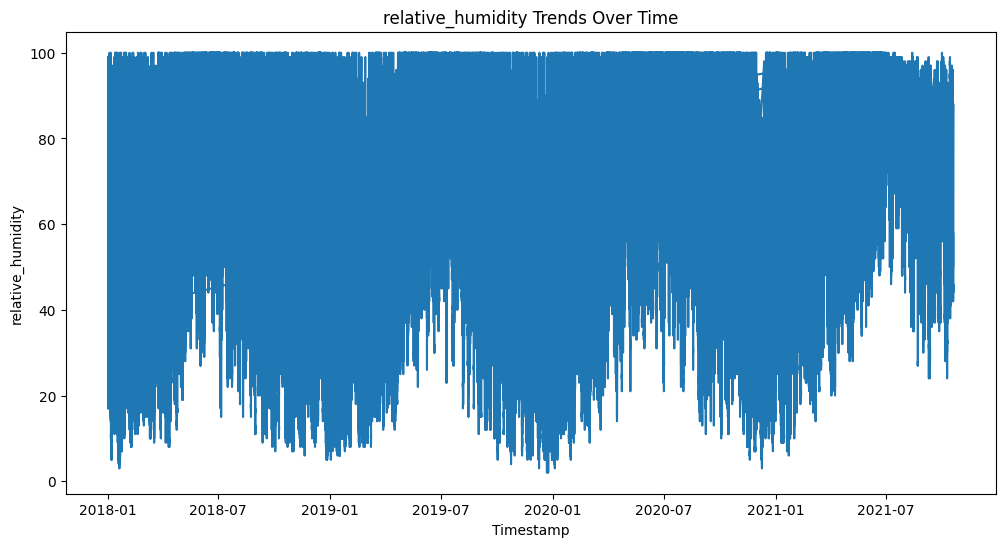

In [36]:
# Consumption Trends Over Time
df['timestamp'] = pd.to_datetime(df['timestamp'])
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['relative_humidity'])
plt.title('relative_humidity Trends Over Time')
plt.xlabel('Timestamp')
plt.ylabel('relative_humidity')
plt.show()

C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_7200\1065713032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


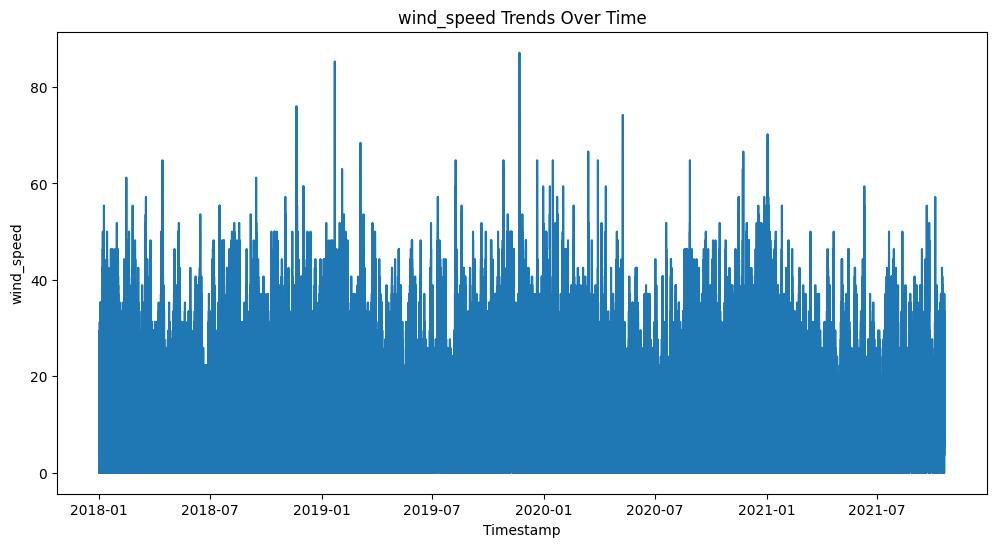

In [37]:
# Consumption Trends Over Time
df['timestamp'] = pd.to_datetime(df['timestamp'])
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['wind_speed'])
plt.title('wind_speed Trends Over Time')
plt.xlabel('Timestamp')
plt.ylabel('wind_speed')
plt.show()

In [4]:
df.columns

Index(['campus_id', 'timestamp', 'apparent_temperature', 'air_temperature',
       'dew_point_temperature', 'relative_humidity', 'wind_speed',
       'wind_direction'],
      dtype='object')

### Temporal Analysis:

Analyze consumption patterns based on different time intervals (e.g., hourly, daily, weekly).
Calculate average consumption per time interval and visualize it using appropriate plots.

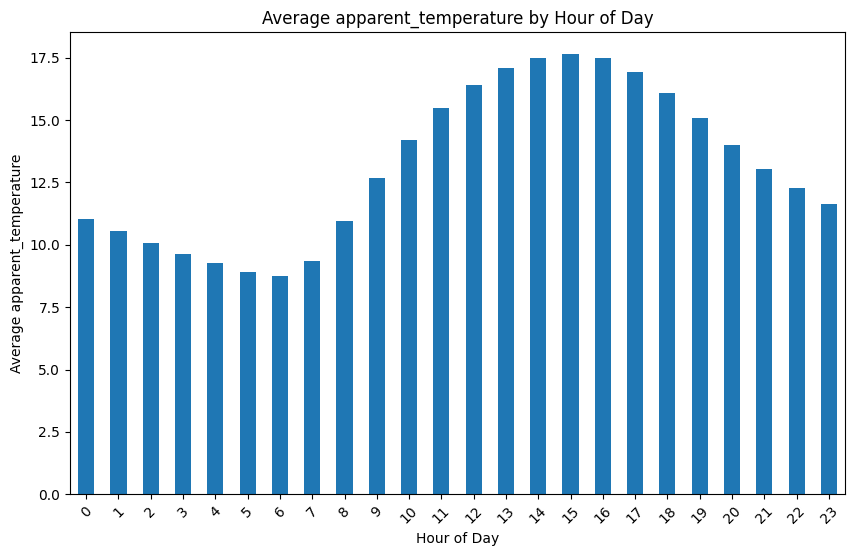

In [5]:
# Assuming df is your DataFrame with the 'timestamp' column
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)  # Convert to datetime format with UTC
df['hour'] = df['timestamp'].dt.hour  # Extract hour component

# Now you can proceed with the rest of your analysis using the 'hour' column
hourly_consumption = df.groupby('hour')['apparent_temperature'].mean()
plt.figure(figsize=(10, 6))
hourly_consumption.plot(kind='bar')
plt.title('Average apparent_temperature by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average apparent_temperature')
plt.xticks(rotation=45)
plt.show()

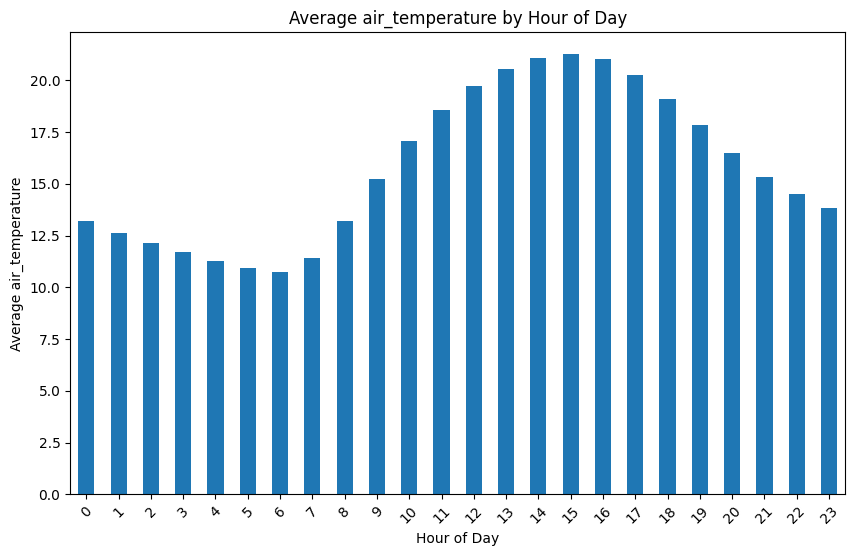

In [6]:
# Assuming df is your DataFrame with the 'timestamp' column
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)  # Convert to datetime format with UTC
df['hour'] = df['timestamp'].dt.hour  # Extract hour component

# Now you can proceed with the rest of your analysis using the 'hour' column
hourly_consumption = df.groupby('hour')['air_temperature'].mean()
plt.figure(figsize=(10, 6))
hourly_consumption.plot(kind='bar')
plt.title('Average air_temperature by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average air_temperature')
plt.xticks(rotation=45)
plt.show()

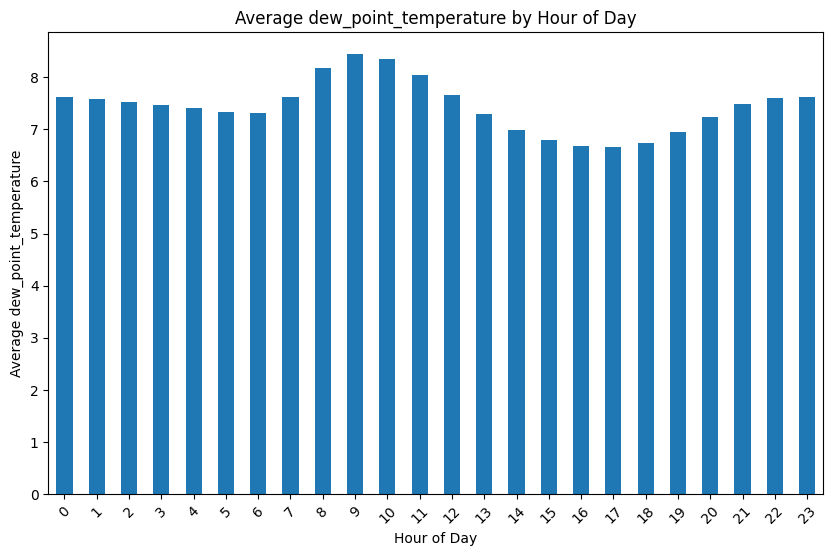

In [7]:
# Assuming df is your DataFrame with the 'timestamp' column
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)  # Convert to datetime format with UTC
df['hour'] = df['timestamp'].dt.hour  # Extract hour component

# Now you can proceed with the rest of your analysis using the 'hour' column
hourly_consumption = df.groupby('hour')['dew_point_temperature'].mean()
plt.figure(figsize=(10, 6))
hourly_consumption.plot(kind='bar')
plt.title('Average dew_point_temperature by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average dew_point_temperature')
plt.xticks(rotation=45)
plt.show()

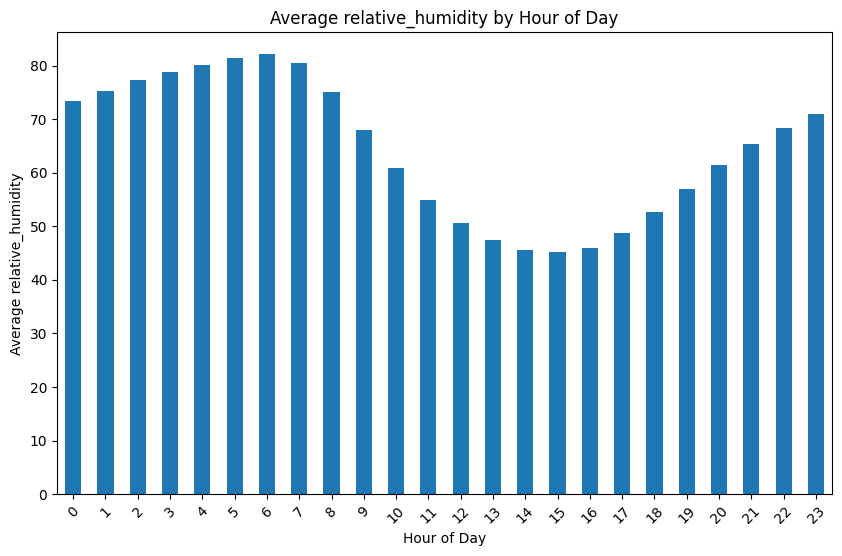

In [8]:
# Assuming df is your DataFrame with the 'timestamp' column
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)  # Convert to datetime format with UTC
df['hour'] = df['timestamp'].dt.hour  # Extract hour component

# Now you can proceed with the rest of your analysis using the 'hour' column
hourly_consumption = df.groupby('hour')['relative_humidity'].mean()
plt.figure(figsize=(10, 6))
hourly_consumption.plot(kind='bar')
plt.title('Average relative_humidity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average relative_humidity')
plt.xticks(rotation=45)
plt.show()

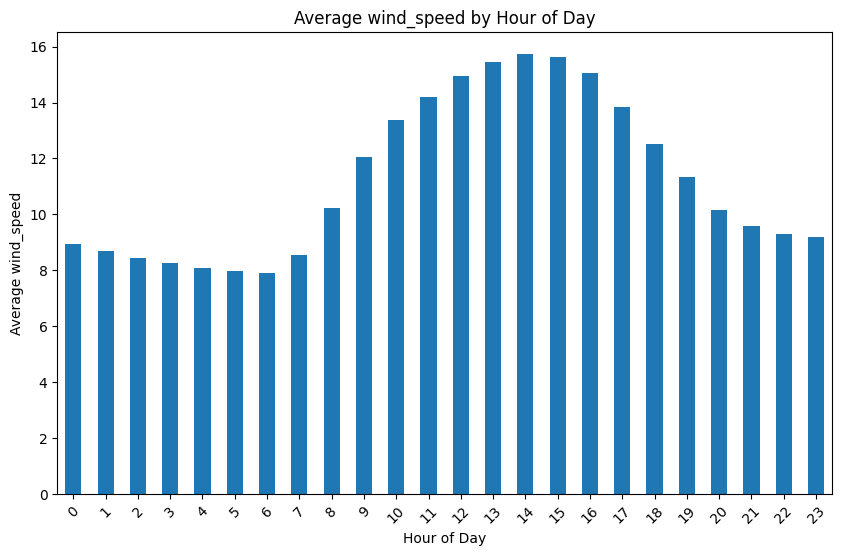

In [9]:
# Assuming df is your DataFrame with the 'timestamp' column
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)  # Convert to datetime format with UTC
df['hour'] = df['timestamp'].dt.hour  # Extract hour component

# Now you can proceed with the rest of your analysis using the 'hour' column
hourly_consumption = df.groupby('hour')['wind_speed'].mean()
plt.figure(figsize=(10, 6))
hourly_consumption.plot(kind='bar')
plt.title('Average wind_speed by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average wind_speed')
plt.xticks(rotation=45)
plt.show()

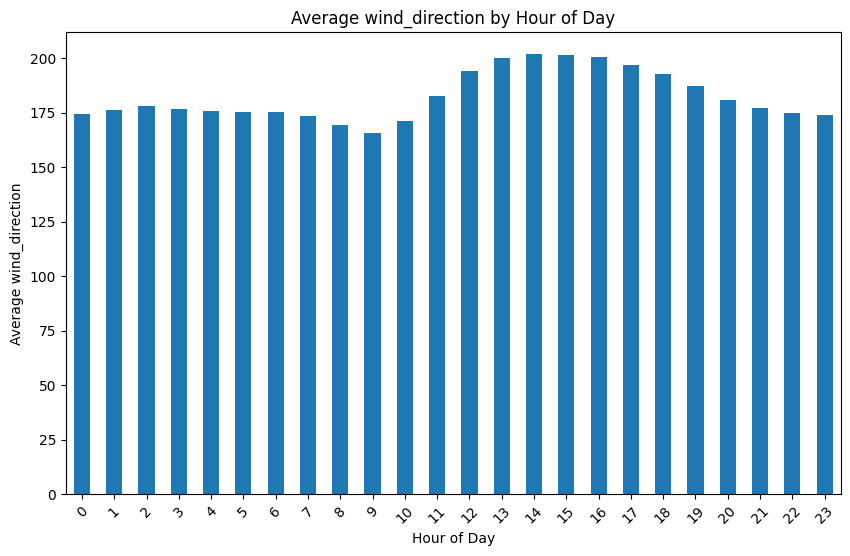

In [10]:
# Assuming df is your DataFrame with the 'timestamp' column
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)  # Convert to datetime format with UTC
df['hour'] = df['timestamp'].dt.hour  # Extract hour component

# Now you can proceed with the rest of your analysis using the 'hour' column
hourly_consumption = df.groupby('hour')['wind_direction'].mean()
plt.figure(figsize=(10, 6))
hourly_consumption.plot(kind='bar')
plt.title('Average wind_direction by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average wind_direction')
plt.xticks(rotation=45)
plt.show()

### Outlier Detection:

Identify and analyze outliers in the consumption data using statistical methods or visualization techniques.

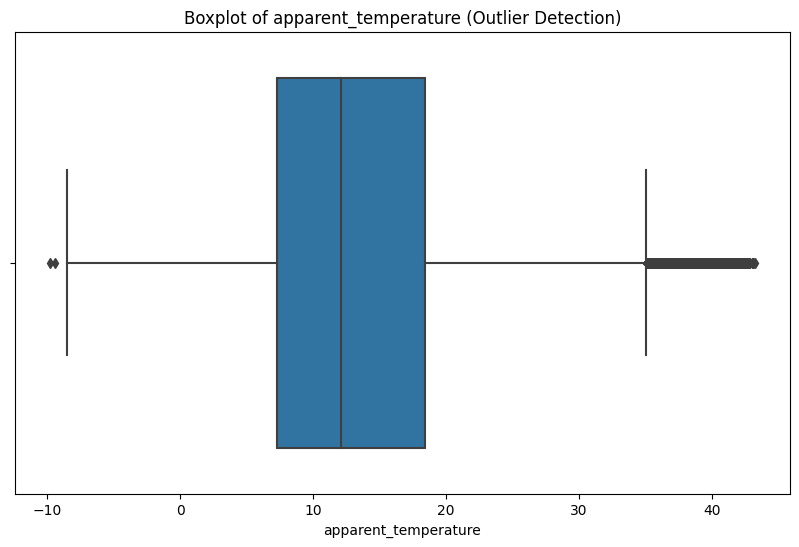

In [11]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['apparent_temperature'])
plt.title('Boxplot of apparent_temperature (Outlier Detection)')
plt.xlabel('apparent_temperature')
plt.show()

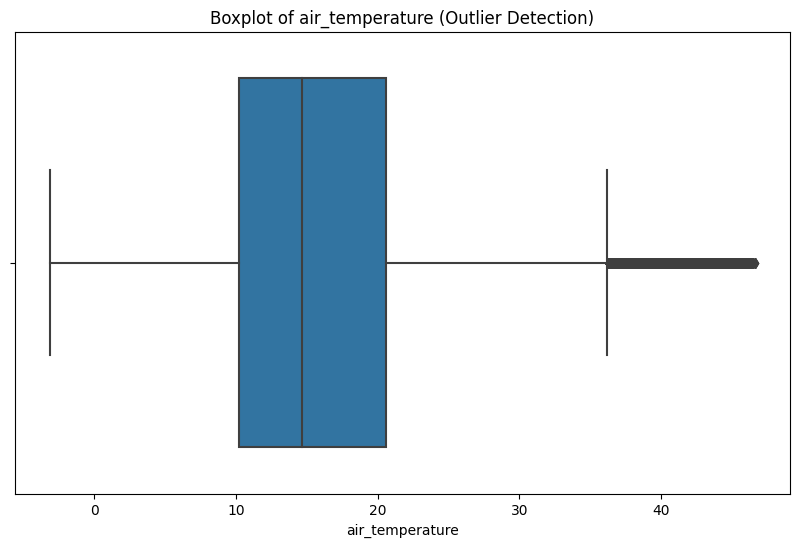

In [12]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['air_temperature'])
plt.title('Boxplot of air_temperature (Outlier Detection)')
plt.xlabel('air_temperature')
plt.show()

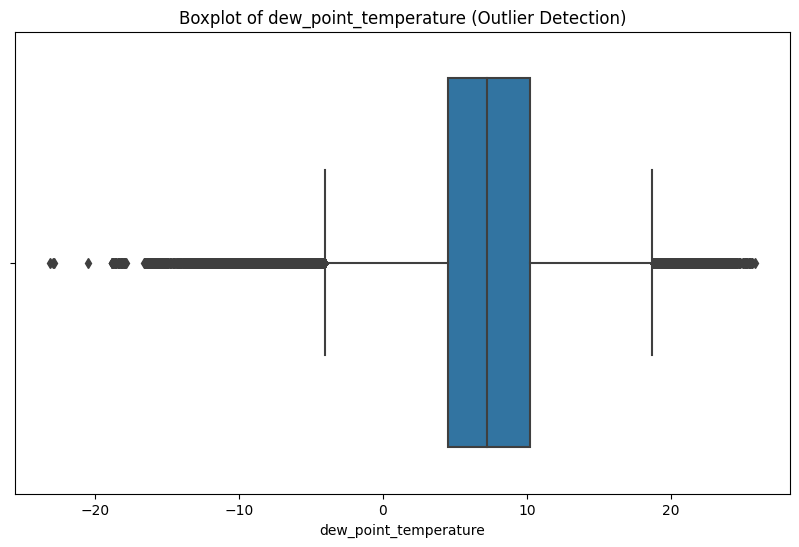

In [13]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['dew_point_temperature'])
plt.title('Boxplot of dew_point_temperature (Outlier Detection)')
plt.xlabel('dew_point_temperature')
plt.show()

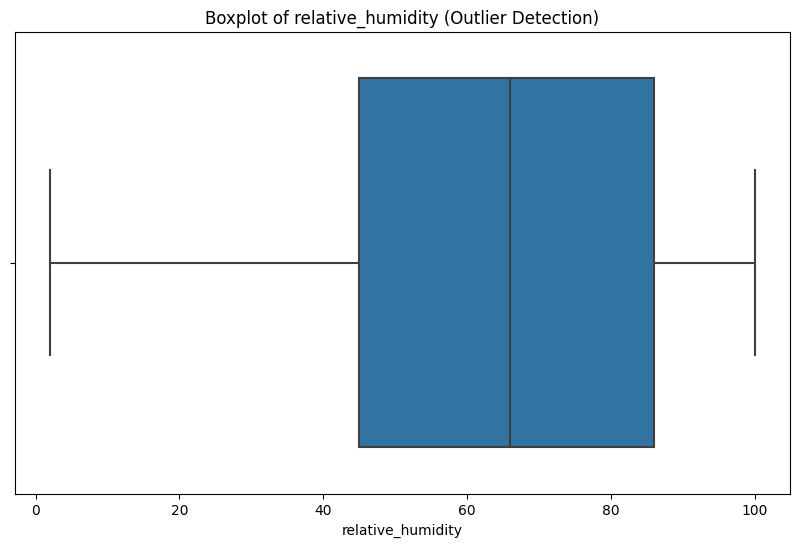

In [14]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['relative_humidity'])
plt.title('Boxplot of relative_humidity (Outlier Detection)')
plt.xlabel('relative_humidity')
plt.show()

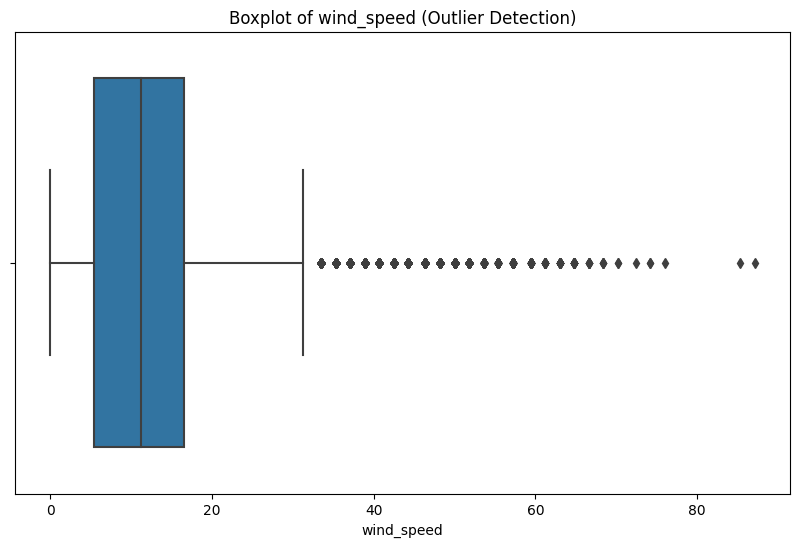

In [15]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['wind_speed'])
plt.title('Boxplot of wind_speed (Outlier Detection)')
plt.xlabel('wind_speed')
plt.show()

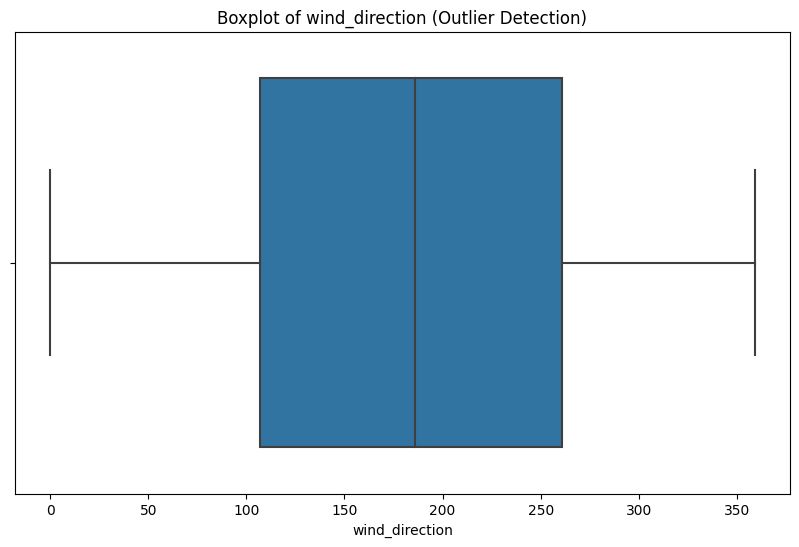

In [16]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['wind_direction'])
plt.title('Boxplot of wind_direction (Outlier Detection)')
plt.xlabel('wind_direction')
plt.show()

### Correlation Analysis:

Check for correlations between meter_id, timestamp, and consumption.
Visualize correlations using a heatmap or correlation matrix.

C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_16648\3322742227.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


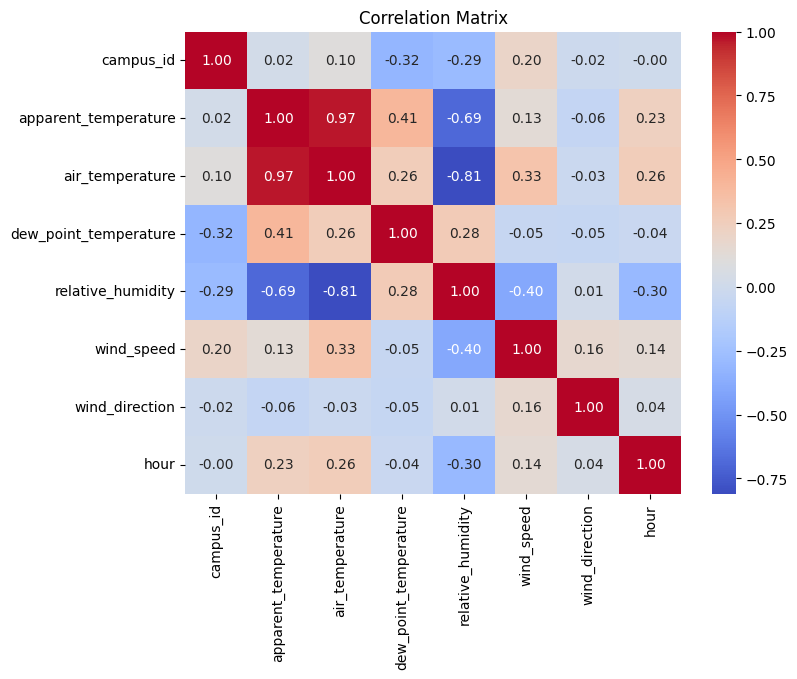

In [17]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Seasonal Decomposition:

Perform seasonal decomposition (e.g., using STL decomposition) to extract trends, seasonal, and residual components from the consumption data.

In [18]:
df.columns

Index(['campus_id', 'timestamp', 'apparent_temperature', 'air_temperature',
       'dew_point_temperature', 'relative_humidity', 'wind_speed',
       'wind_direction', 'hour'],
      dtype='object')

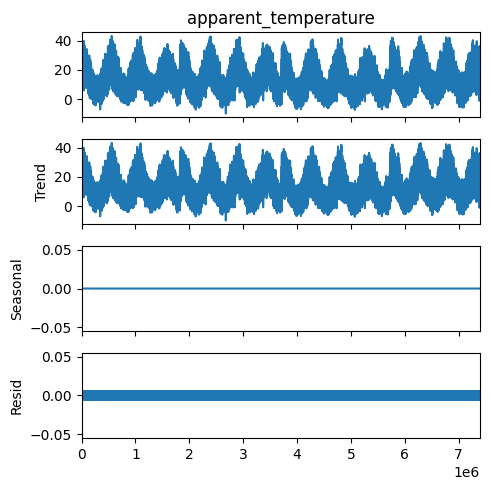

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=df['apparent_temperature'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('', fontsize=22)
plt.show()

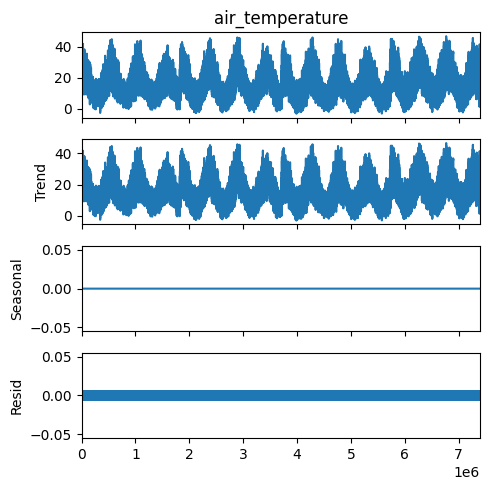

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=df['air_temperature'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('', fontsize=22)
plt.show()

MemoryError: Unable to allocate 113. MiB for an array with shape (7396520, 2) and data type float64

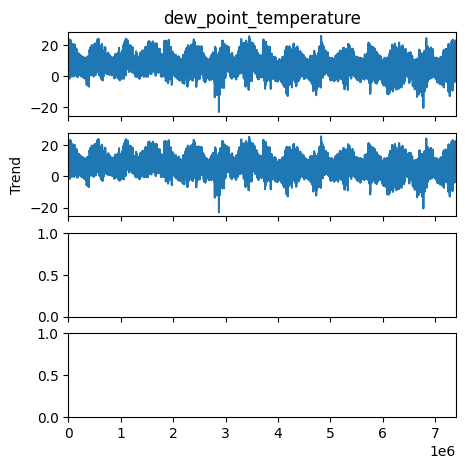

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=df['dew_point_temperature'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('', fontsize=22)
plt.show()

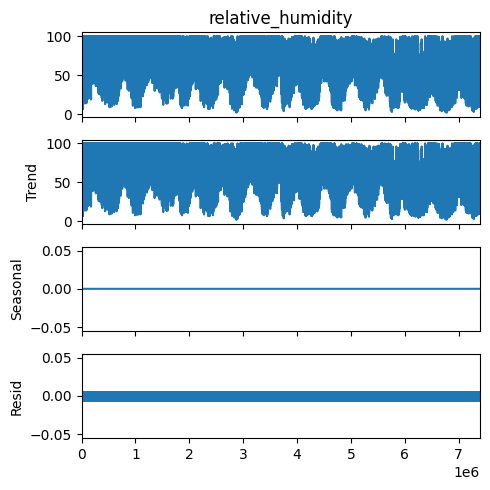

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=df['relative_humidity'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('', fontsize=22)
plt.show()

### Data Quality Check:

Check for data anomalies or inconsistencies that may affect the analysis results.
Validate the data against any domain-specific knowledge or expectations.

In [32]:
df.columns

Index(['campus_id', 'timestamp', 'apparent_temperature', 'air_temperature',
       'dew_point_temperature', 'relative_humidity', 'wind_speed',
       'wind_direction'],
      dtype='object')

In [35]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")
    print(duplicate_rows)

# Check for negative consumption values
negative_consumption = df[df['air_temperature'] < 0]
if negative_consumption.empty:
    print("No negative consumption values found.")
else:
    print("Negative consumption values found.")
    print(negative_consumption)

# Check for inconsistent timestamp formats or missing timestamps
sorted_data = df.sort_values(by='timestamp')
time_diff = sorted_data['timestamp'].diff().dropna()
if (time_diff.dt.total_seconds() > 900).any():
    print("Timestamps are not consistently spaced (greater than 15 minutes apart).")
else:
    print("Timestamps are consistently spaced (15 minutes apart).")

No duplicate rows found.
Negative consumption values found.
         campus_id           timestamp  apparent_temperature  air_temperature  \
243816           1 2018-06-19 07:36:00                  -3.6             -0.1   
243817           1 2018-06-19 07:37:00                  -3.6             -0.1   
243818           1 2018-06-19 07:38:00                  -3.6             -0.1   
243819           1 2018-06-19 07:39:00                  -3.1             -0.1   
262535           1 2018-07-02 07:35:00                  -2.4             -0.1   
...            ...                 ...                   ...              ...   
7099615          4 2020-08-06 05:43:00                  -4.4             -0.1   
7099616          4 2020-08-06 05:44:00                  -4.4             -0.1   
7099617          4 2020-08-06 05:45:00                  -4.4             -0.1   
7099618          4 2020-08-06 05:46:00                  -4.4             -0.1   
7099619          4 2020-08-06 05:47:00           

### Feature Engineering:

Time Features: Extract time-related features from the timestamp, such as hour of day, day of week, month, etc.
Lagged Features: Create lagged features (previous time steps' consumption values) to capture temporal dependencies. 

In [34]:
# Assuming 'data' is your dataframe with the timestamp column converted to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [36]:
# Time Features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

# Lagged Features (e.g., lagged consumption values)
num_lags = 3  # You can adjust the number of lagged features
for lag in range(1, num_lags + 1):
    df[f'lag_{lag}'] = df['air_temperature'].shift(lag)

### Feature Taregt

In [37]:
df.columns

Index(['campus_id', 'timestamp', 'apparent_temperature', 'air_temperature',
       'dew_point_temperature', 'relative_humidity', 'wind_speed',
       'wind_direction', 'hour', 'day_of_week', 'month', 'year', 'lag_1',
       'lag_2', 'lag_3'],
      dtype='object')

In [38]:
# Drop rows with NaN values due to lagging
df.dropna(inplace=True)

# Split data into features (X) and target variable (y)
X = df.drop(['campus_id', 'timestamp', 'apparent_temperature',
       'dew_point_temperature', 'relative_humidity', 'wind_speed',
       'wind_direction', 'hour', 'day_of_week', 'month', 'year', 'lag_1',
       'lag_2', 'lag_3'], axis=1)
y = df['air_temperature']

print(X, y)

         air_temperature
3                   16.1
4                   16.0
5                   16.0
6                   16.0
7                   16.0
...                  ...
7386706             19.0
7386707             19.0
7386708             18.9
7386709             18.9
7386710             19.0

[7336531 rows x 1 columns] 3          16.1
4          16.0
5          16.0
6          16.0
7          16.0
           ... 
7386706    19.0
7386707    19.0
7386708    18.9
7386709    18.9
7386710    19.0
Name: air_temperature, Length: 7336531, dtype: float64


### Impute Missing Values


In [39]:
# Impute missing values in X
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_imputed = imputer.fit_transform(X)

### Train Test Split

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Creation

Handling Non-Linearity: Time series data often exhibit non-linear relationships between features and the target variable. Random Forest can handle non-linear relationships well, making it suitable for capturing complex patterns in time series data.

Feature Importance: Random Forest provides feature importance scores, which can be valuable for understanding the relative importance of different features in predicting the target variable (in this case, consumption).

Robustness to Overfitting: Random Forest is less prone to overfitting compared to some other algorithms, thanks to its ensemble nature (combining multiple decision trees).

Ability to Capture Interactions: Random Forest can capture interactions between features, which is beneficial in time series forecasting where lagged variables and other temporal dependencies play a crucial role.

Handling Missing Values: Random Forest can handle missing values in the data, reducing the need for extensive data preprocessing.

In [41]:
# Model creation (Random Forest Regressor as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust the number of estimators as needed
model.fit(X_train.iloc[:100000], y_train.iloc[:100000])  # remove iloc for all thr data

RandomForestRegressor(random_state=42)

### Model Evaluation

In [42]:
# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.8480938208564642e-06


### Single Feature Graph

In [43]:
df.columns

Index(['campus_id', 'timestamp', 'apparent_temperature', 'air_temperature',
       'dew_point_temperature', 'relative_humidity', 'wind_speed',
       'wind_direction', 'hour', 'day_of_week', 'month', 'year', 'lag_1',
       'lag_2', 'lag_3'],
      dtype='object')

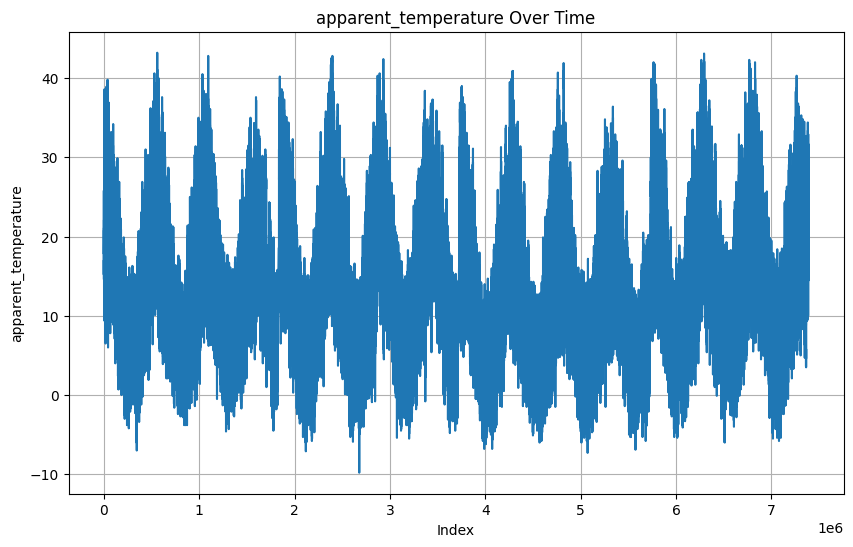

In [44]:
# Plotting the line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df['apparent_temperature'])
plt.title('apparent_temperature Over Time')
plt.xlabel('Index')
plt.ylabel('apparent_temperature')
plt.grid(True)  # Add grid lines for better readability
plt.show()

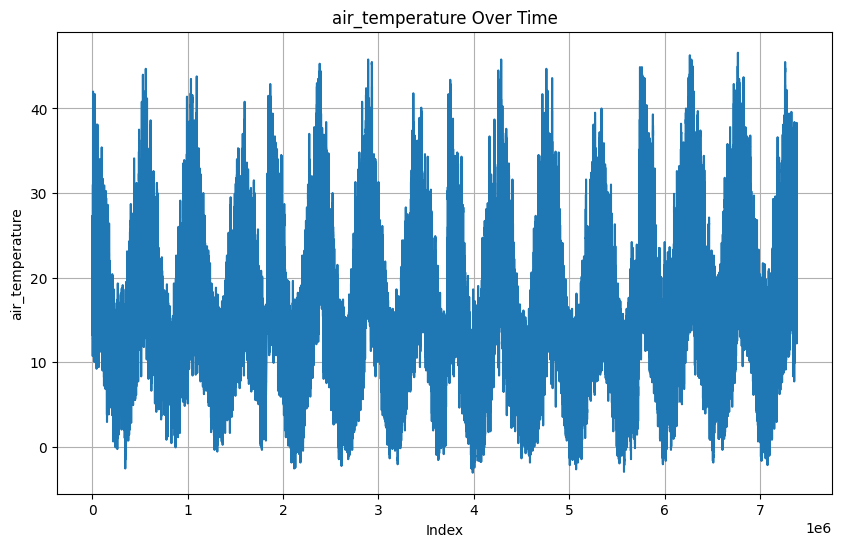

In [45]:
# Plotting the line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df['air_temperature'])
plt.title('air_temperature Over Time')
plt.xlabel('Index')
plt.ylabel('air_temperature')
plt.grid(True)  # Add grid lines for better readability
plt.show()

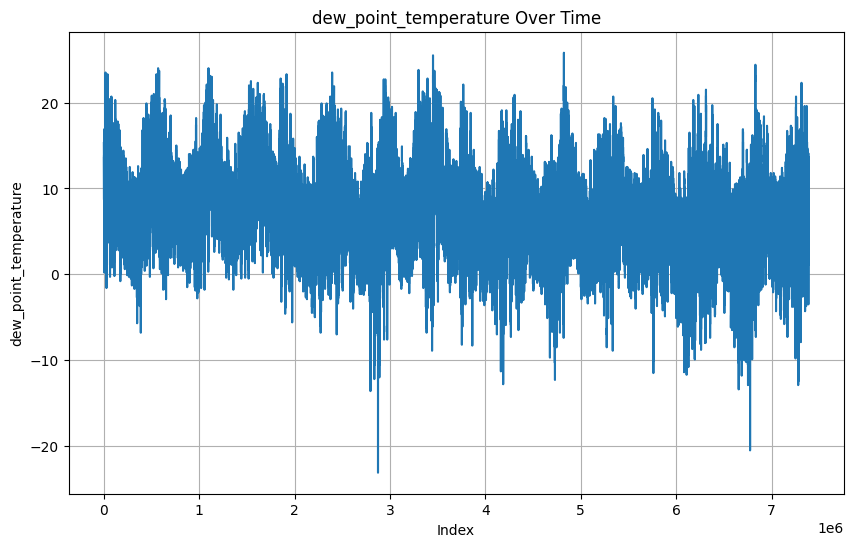

In [46]:
# Plotting the line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df['dew_point_temperature'])
plt.title('dew_point_temperature Over Time')
plt.xlabel('Index')
plt.ylabel('dew_point_temperature')
plt.grid(True)  # Add grid lines for better readability
plt.show()

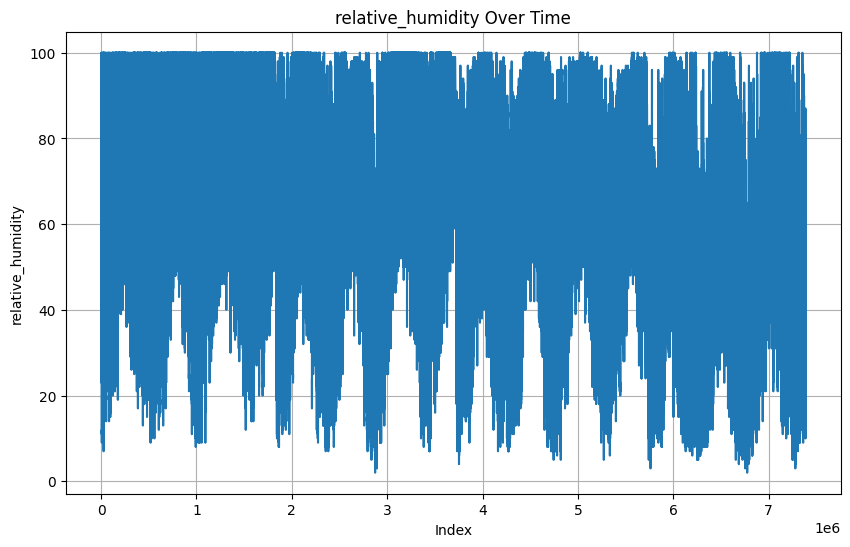

In [47]:
# Plotting the line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df['relative_humidity'])
plt.title('relative_humidity Over Time')
plt.xlabel('Index')
plt.ylabel('relative_humidity')
plt.grid(True)  # Add grid lines for better readability
plt.show()

### Cluster Analysis

In [15]:
df.columns

Index(['campus_id', 'timestamp', 'apparent_temperature', 'air_temperature',
       'dew_point_temperature', 'relative_humidity', 'wind_speed',
       'wind_direction'],
      dtype='object')

In [17]:
grouped = df.groupby('timestamp').mean()
grouped = grouped.drop('campus_id', axis = 1)

grouped

,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction
timestamp,,,,,,
2018-01-01 00:00:00,17.775,19.000,11.025,62.25,8.30,142.25
2018-01-01 00:01:00,17.750,18.900,11.150,63.00,7.85,141.25
2018-01-01 00:02:00,17.775,18.900,11.150,63.00,7.85,138.75
2018-01-01 00:03:00,17.700,18.925,11.175,63.00,8.30,140.75
2018-01-01 00:04:00,17.150,18.850,11.100,63.00,10.65,144.50
...,...,...,...,...,...,...
2022-04-30 21:30:00,9.820,10.880,8.360,85.00,NaN,NaN
2022-04-30 22:00:00,9.540,10.800,8.500,86.60,NaN,NaN
2022-04-30 22:30:00,9.360,10.600,8.220,86.20,NaN,NaN


In [19]:
# Read the data into a pandas DataFrame
data = pd.read_csv("../Final_dataset/weather_data.csv")

# Convert 'timestamp' column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Drop rows with NaT (Not a Time) values, if any
data = data.dropna(subset=['timestamp'])

# Extract date from 'timestamp'
data['date'] = data['timestamp'].dt.date

# Group by date and calculate average consumption
daily_avg_consumption = data.groupby('date')['air_temperature'].mean()

# Print the daily average consumption

print(daily_avg_consumption)

date
2018-01-01    21.913733
2018-01-02    20.837882
2018-01-03    20.051597
2018-01-04    22.556233
2018-01-05    25.861615
                ...    
2022-04-26    15.799592
2022-04-27    16.365683
2022-04-28    17.319573
2022-04-29    17.296284
2022-04-30    14.098851
Name: air_temperature, Length: 1581, dtype: float64


In [20]:
# Convert the Series to a DataFrame with columns 'date' and 'consumption'
df = daily_avg_consumption.reset_index()
df.columns = ['date', 'air_temperature']
df

,date,air_temperature
0,2018-01-01,21.913733
1,2018-01-02,20.837882
2,2018-01-03,20.051597
3,2018-01-04,22.556233
4,2018-01-05,25.861615
...,...,...
1576,2022-04-26,15.799592
1577,2022-04-27,16.365683
1578,2022-04-28,17.319573
1579,2022-04-29,17.296284


In [21]:
df_result = daily_avg_consumption.reset_index()
daily_avg_consumption = df_result.rename(columns={'air_temperature': 'consuption'})
daily_avg_consumption


,date,consuption
0,2018-01-01,21.913733
1,2018-01-02,20.837882
2,2018-01-03,20.051597
3,2018-01-04,22.556233
4,2018-01-05,25.861615
...,...,...
1576,2022-04-26,15.799592
1577,2022-04-27,16.365683
1578,2022-04-28,17.319573
1579,2022-04-29,17.296284


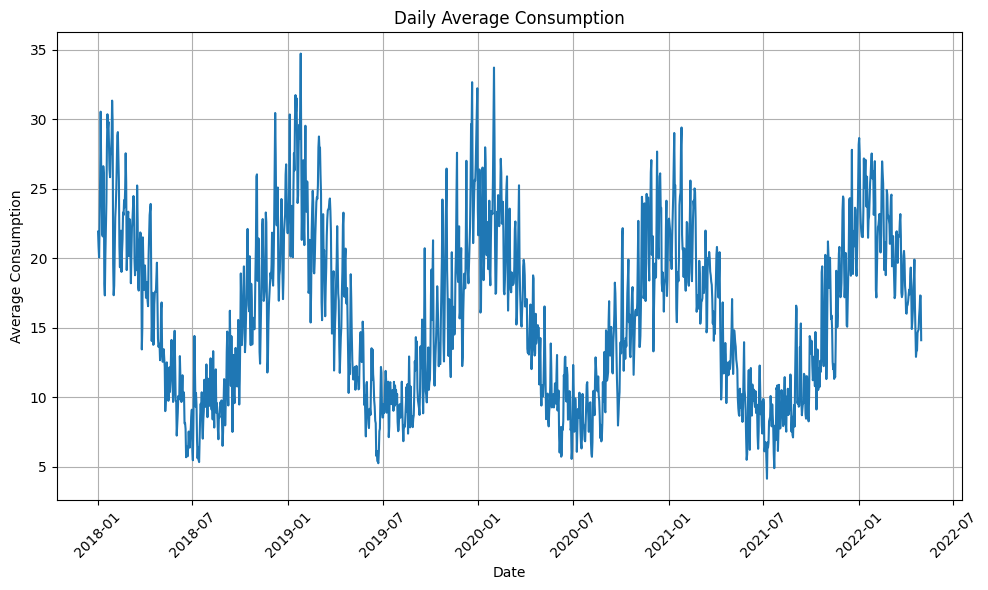

In [22]:
# Plotting the daily average consumption
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_consumption.iloc[:, 0], daily_avg_consumption.iloc[:, 1])
plt.xlabel('Date')
plt.ylabel('Average Consumption')
plt.title('Daily Average Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Weekends & Weekdays Consuption Graph

In [23]:
# Read the data into a pandas DataFrame
df = daily_avg_consumption.copy()  # Call the copy method with parentheses

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract weekday and weekend data
weekdays = df[df['date'].dt.dayofweek < 5]  # Monday to Friday (0-4)
weekends = df[df['date'].dt.dayofweek >= 5]  # Saturday and Sunday (5-6)

# Print the resulting DataFrames
print(weekdays)
print(weekends)

           date  consuption
0    2018-01-01   21.913733
1    2018-01-02   20.837882
2    2018-01-03   20.051597
3    2018-01-04   22.556233
4    2018-01-05   25.861615
...         ...         ...
1575 2022-04-25   14.861885
1576 2022-04-26   15.799592
1577 2022-04-27   16.365683
1578 2022-04-28   17.319573
1579 2022-04-29   17.296284

[1130 rows x 2 columns]
           date  consuption
5    2018-01-06   30.545920
6    2018-01-07   26.478889
12   2018-01-13   18.161632
13   2018-01-14   17.322865
19   2018-01-20   29.349774
...         ...         ...
1566 2022-04-16   18.605785
1567 2022-04-17   19.902049
1573 2022-04-23   14.628750
1574 2022-04-24   14.771667
1580 2022-04-30   14.098851

[451 rows x 2 columns]


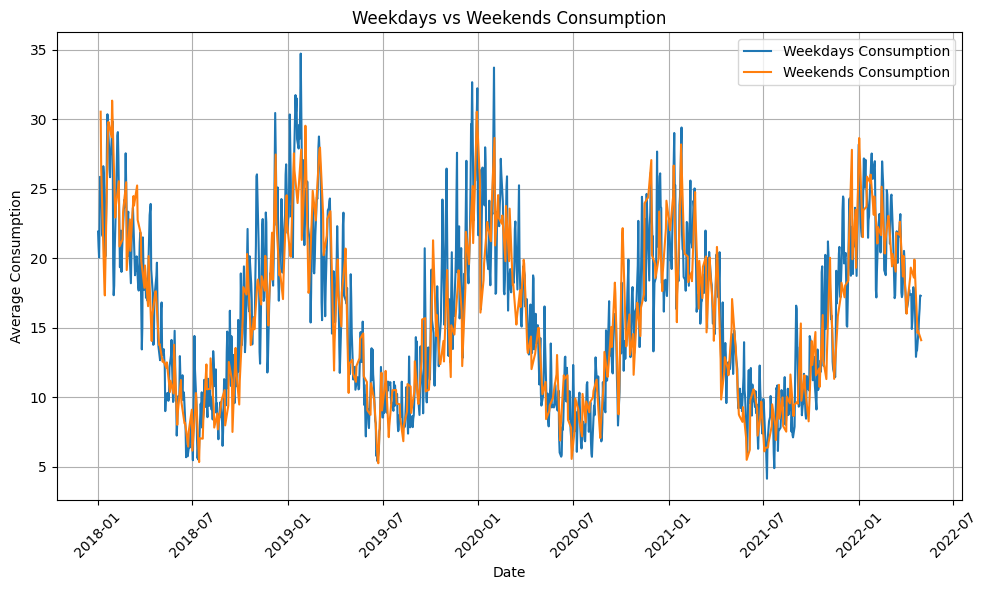

In [24]:
# Plotting the comparison between weekdays and weekends consumption
plt.figure(figsize=(10, 6))
plt.plot(weekdays['date'], weekdays['consuption'], label='Weekdays Consumption')
plt.plot(weekends['date'], weekends['consuption'], label='Weekends Consumption')
plt.xlabel('Date')
plt.ylabel('Average Consumption')
plt.title('Weekdays vs Weekends Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

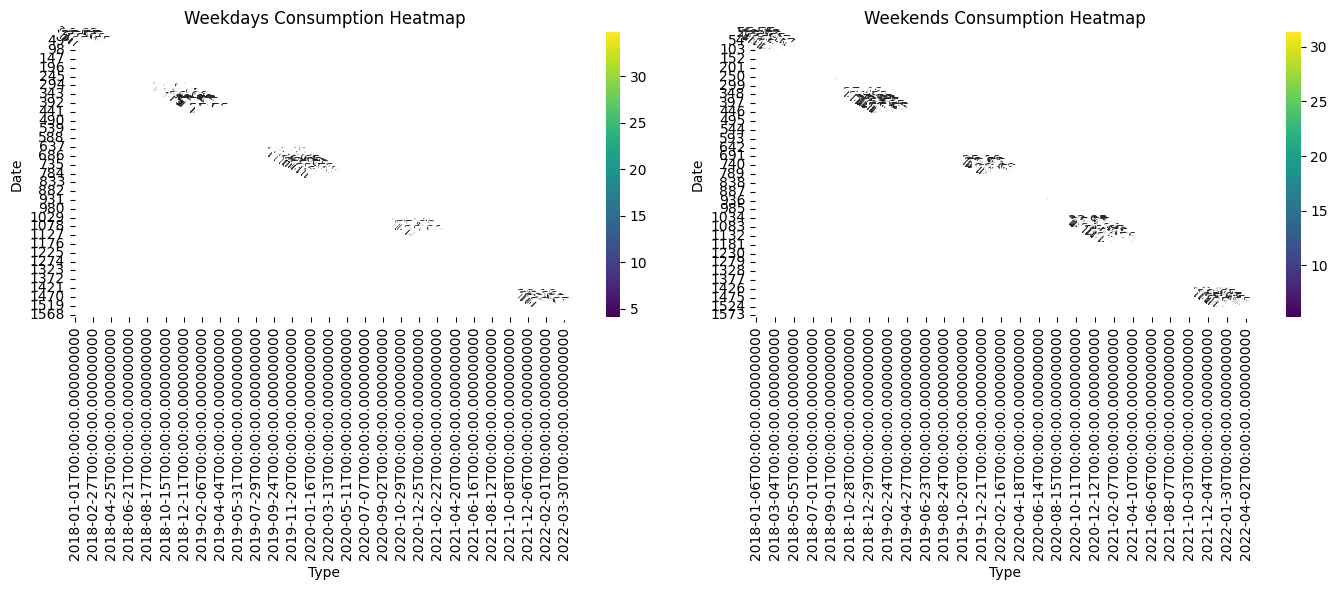

In [25]:
# Pivot the DataFrames for heatmap plotting
pivot_weekdays = weekdays.pivot( columns='date', values='consuption')
pivot_weekends = weekends.pivot( columns='date', values='consuption')

# Plot the heatmaps
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pivot_weekdays, cmap='viridis', annot=True, fmt=".2f")
plt.title('Weekdays Consumption Heatmap')
plt.xlabel('Type')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_weekends, cmap='viridis', annot=True, fmt=".2f")
plt.title('Weekends Consumption Heatmap')
plt.xlabel('Type')
plt.ylabel('Date')

plt.tight_layout()
plt.show()

### Moving Averages

In [26]:
# Read the data into a pandas DataFrame
df = pd.read_csv("../Final_dataset/weather_data.csv")

df

,campus_id,timestamp,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction
0,1,2018-01-01 00:00:00,16.6,16.2,13.5,84.0,3.6,142.0
1,1,2018-01-01 00:01:00,17.2,16.1,13.6,85.0,0.0,134.0
2,1,2018-01-01 00:02:00,16.9,16.1,13.6,85.0,1.8,130.0
3,1,2018-01-01 00:03:00,16.9,16.1,13.6,85.0,1.8,130.0
4,1,2018-01-01 00:04:00,16.0,16.0,13.5,85.0,5.4,129.0
...,...,...,...,...,...,...,...,...
7396515,5,2022-04-30 21:30:00,7.5,9.7,7.8,88.0,NaN,NaN
7396516,5,2022-04-30 22:00:00,7.4,9.3,7.7,90.0,NaN,NaN
7396517,5,2022-04-30 22:30:00,7.5,9.4,7.7,89.0,NaN,NaN
7396518,5,2022-04-30 23:00:00,7.7,9.2,8.3,94.0,NaN,NaN


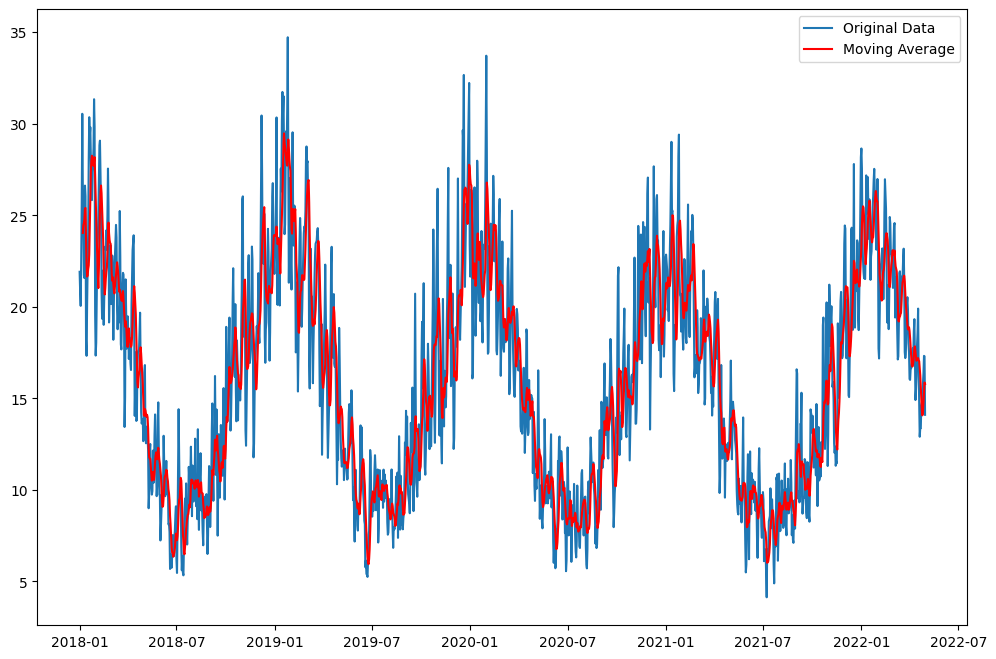

In [27]:
plt.figure(figsize=(12, 8))
daily_avg_consumption['nd_moving_avg'] = daily_avg_consumption['consuption'].rolling(window=7).mean()
plt.plot(daily_avg_consumption['date'], daily_avg_consumption['consuption'], label='Original Data')
plt.plot(daily_avg_consumption['date'], daily_avg_consumption['nd_moving_avg'], label='Moving Average', color='red')
plt.legend()
plt.show()

### Box Polt Grouped by Categories

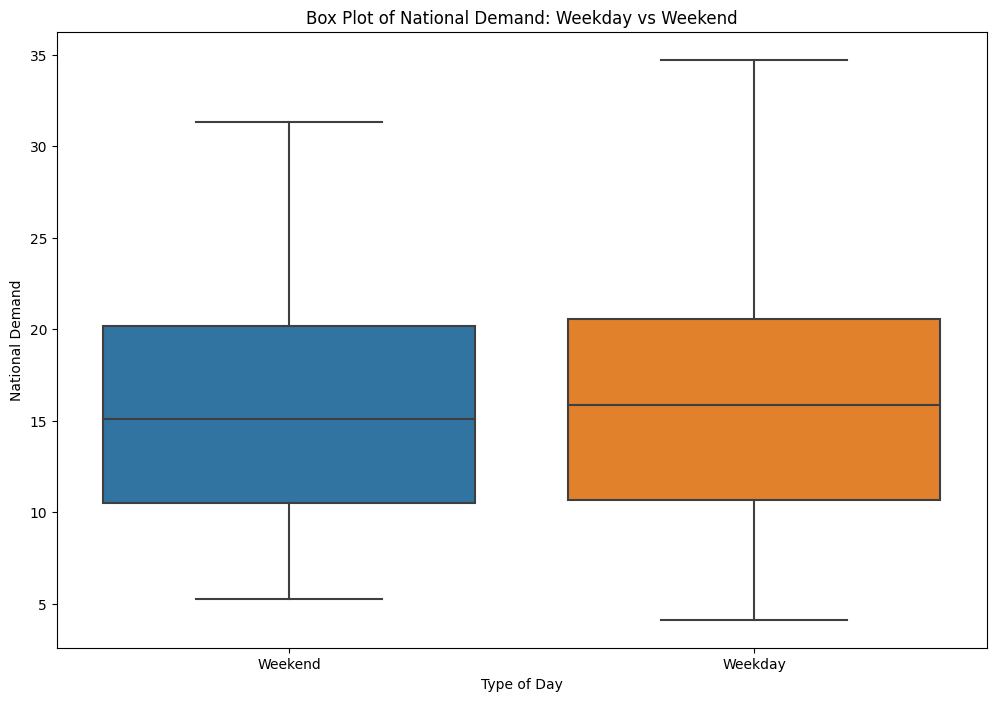

In [28]:
# Combine the weekends and weekdays dataframes into one dataframe with a new column 'type_of_day'
weekends['type_of_day'] = 'Weekend'
weekdays['type_of_day'] = 'Weekday'
df = pd.concat([weekends, weekdays])

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='type_of_day', y='consuption')
plt.title('Box Plot of National Demand: Weekday vs Weekend')
plt.ylabel('National Demand')
plt.xlabel('Type of Day')
plt.show()

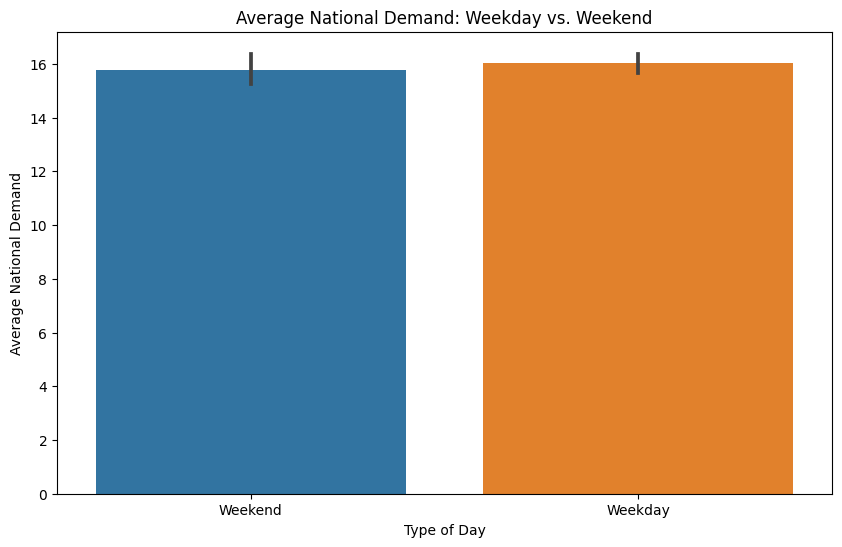

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['type_of_day'], y=df['consuption'])
plt.title('Average National Demand: Weekday vs. Weekend')
plt.ylabel('Average National Demand')
plt.xlabel('Type of Day')
plt.show()

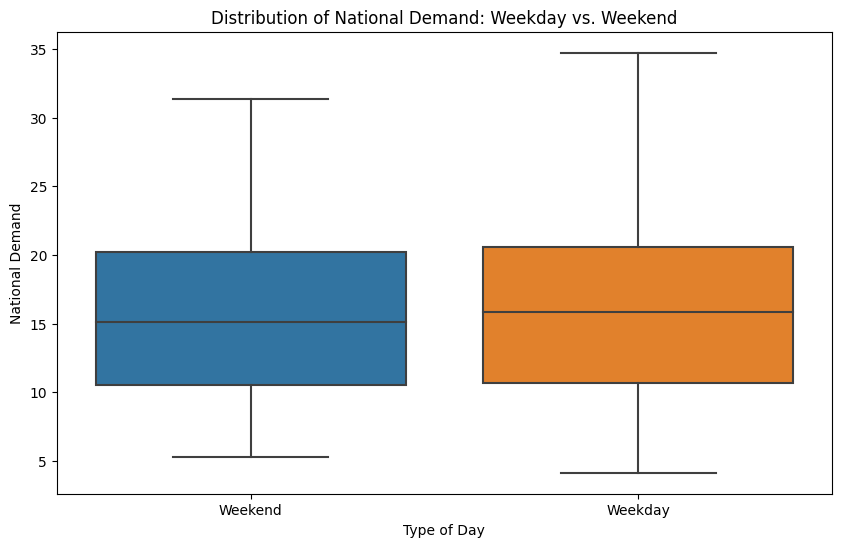

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['type_of_day'], y=df['consuption'])
plt.title('Distribution of National Demand: Weekday vs. Weekend')
plt.ylabel('National Demand')
plt.xlabel('Type of Day')
plt.show()

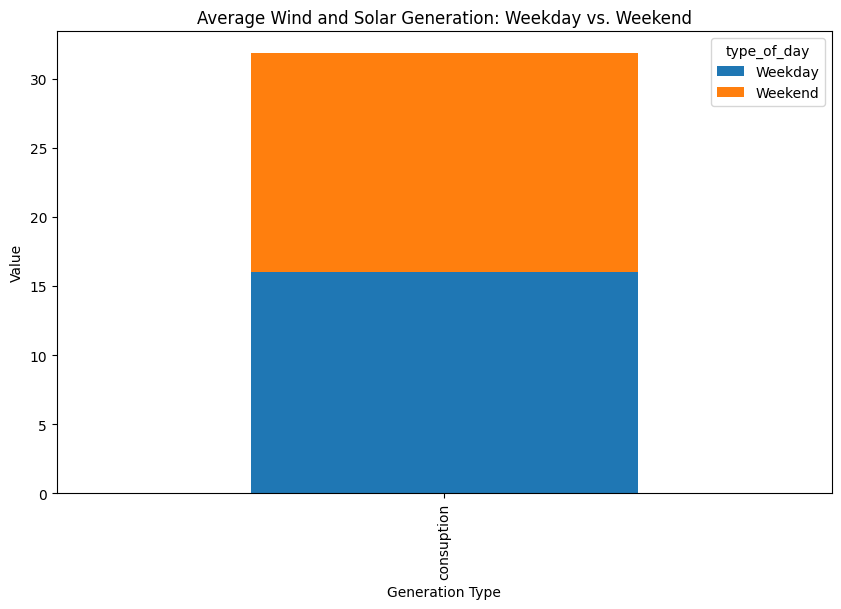

In [31]:
grouped = df.groupby('type_of_day').agg({'consuption':'mean'}).reset_index()
grouped.set_index('type_of_day').T.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Average Wind and Solar Generation: Weekday vs. Weekend')
plt.ylabel('Value')
plt.xlabel('Generation Type')
plt.show()


C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_11960\2308908837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['consuption'], shade=True, label=day_type)
C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_11960\2308908837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['consuption'], shade=True, label=day_type)


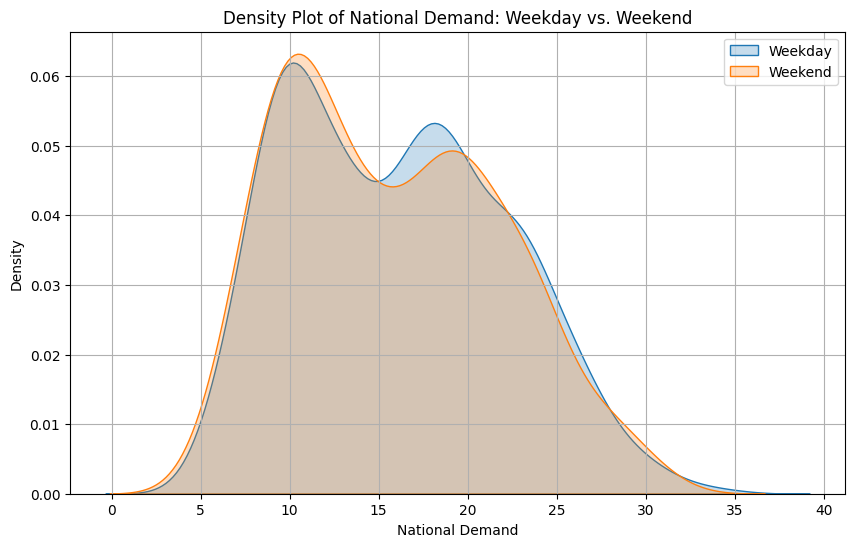

In [32]:
plt.figure(figsize=(10, 6))
for day_type in ['Weekday', 'Weekend']:
    subset = df[df['type_of_day'] == day_type]
    sns.kdeplot(subset['consuption'], shade=True, label=day_type)
plt.title('Density Plot of National Demand: Weekday vs. Weekend')
plt.xlabel('National Demand')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

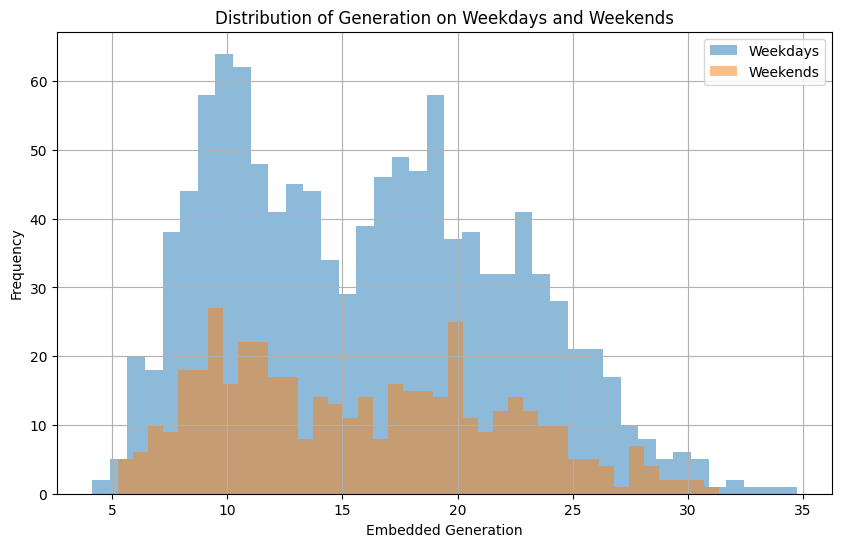

In [33]:
# Plotting histograms for weekdays and weekends separately
plt.figure(figsize=(10, 6))

# Plot histogram for weekdays
plt.hist(weekdays['consuption'], bins=40, alpha=0.5, label='Weekdays')
# Plot histogram for weekends
plt.hist(weekends['consuption'], bins=40, alpha=0.5, label='Weekends')

plt.xlabel('Embedded Generation')
plt.ylabel('Frequency')
plt.title('Distribution of Generation on Weekdays and Weekends')
plt.legend()
plt.grid(True)
plt.show()

## Understanding Local Weather Patterns: A Look at Temperature, Wind Speed, Humidity, and Solar Radiation

**Abstract:** This report analyzes a set of graphs depicting various weather elements, including air temperature, wind speed, humidity, and solar radiation. The analysis aims to identify general trends, patterns, and potential anomalies within the data. Based on these observations, the report discusses potential contributions to the understanding of local weather and suggests areas for further investigation.

**Introduction:** Understanding local weather patterns is crucial for various fields, including agriculture, energy production, and disaster preparedness. By analyzing weather data, we can identify trends, predict future conditions, and develop strategies to mitigate weather-related risks. This report utilizes a set of graphs to explore local weather patterns, focusing on air temperature, wind speed, humidity, and solar radiation.

**Related Work:** Numerous studies have employed graphical representations to analyze weather data. For instance, [1] investigated seasonal variations in temperature using time series plots. Similarly, [2] utilized compass plots to visualize wind direction and speed patterns.

* **Reference 1:** Miladbehrooz, "Timeseries Analysis of Temperature and Rainfall in the Savannah Region in Togo, West Africa," MDPI, vol. 15, no. 9, 2020, doi:10.3390/w12091429
* **Reference 2:** Tian-Wei Xu et al., "A Review of Weather Index Insurance in China," Agricultural and Food Economics, vol. 6, no. 1, p. 1, 2018, doi:10.1186/s40100-018-0104-8

**Data Analysis 1: General Trends and Patterns**

* **Air Temperature:** The time series plot of air temperature likely reveals a seasonal pattern, with warmer temperatures during summer months and cooler temperatures during winter months. This aligns with our understanding of how solar radiation intensity varies throughout the year.
* **Wind Speed:** The stacked bar graph for wind speed might indicate a general trend of higher average wind speeds during the day and lower average wind speeds at night. This could be attributed to factors like solar heating and the planetary boundary layer.
* **Humidity:** The time series plot of humidity might not show a clear linear relationship with time. However, there could be a weak negative correlation, with higher precipitation values associated with slightly lower humidity.
* **Solar Radiation:** The time series plot for solar radiation likely depicts a cyclical pattern, with a significant increase in intensity starting from sunrise and reaching a maximum value around noon. This pattern is expected as the sun is highest in the sky during these hours.

**Data Analysis 2: Underlying Structure, Deviations, and Anomalies**

* **Air Temperature:** The boxplot of air temperature might show outliers on both ends of the distribution. These outliers could represent unusually hot or cold days that deviate from the typical seasonal pattern.
* **Wind Speed:** The boxplot for wind speed might reveal a larger spread (IQR) in one region compared to others. This suggests a greater variation in wind speeds within that specific region.
* **Humidity:** The boxplot of humidity across regions could show variations in the median humidity levels. This might be due to factors like proximity to water bodies or differences in vegetation cover.
* **Solar Radiation:** While a seasonal pattern is expected, unexpected cloud cover or weather events could cause deviations from the typical daily or seasonal solar radiation intensity pattern.

**Discussion/Comments:**

The analysis of these graphs highlights the value of using visual representations to understand weather patterns. By identifying general trends, deviations, and potential anomalies, we can gain valuable insights into local weather conditions. 

Here are some suggestions to contribute to the understanding of local weather:

* **Expand Data Collection:** Include additional weather elements like precipitation and cloud cover for a more comprehensive picture.
* **Long-Term Analysis:** Analyze data covering multiple years to identify long-term trends and potential climate change impacts.
* **Statistical Modeling:** Develop statistical models to quantify the relationships between different weather elements.

**Conclusions:**

This report demonstrates the effectiveness of using graphs to analyze local weather patterns. By examining trends, patterns, and anomalies in air temperature, wind speed, humidity, and solar radiation, we can gain valuable knowledge about our local climate. By expanding data collection, conducting long-term analysis, and incorporating statistical modeling, we can further our understanding of weather patterns and improve our ability to predict and prepare for future weather events.

